<a href="https://colab.research.google.com/github/gusmaomarcos/EngQuimica/blob/main/PBS1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 46.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle

In [ ]:
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [ ]:
df_todos = pd.read_excel('PBS_graficos_1803_raw.xlsx')
#df_todos['Ano'] = df_todos['Ano'].astype(int)
df = df_todos[df_todos.Condicao =='Sim']
df['Ano'] = df['Ano'].astype(int)

<ipython-input-4-c61480ee17c8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ano'] = df['Ano'].astype(int)


In [ ]:
df.head(3)

,Condicao,Condicao_sn,Autores,Titulo,Publicacao,Keywords_Autor,Keywords_Automatico,Resumo,Ano,DOI,Tecnologia_raw,Tecnologia,Volume do\n reator (ml),Volume\nreacional,BDO:AS_raw,BDO:AS,Catalisador 1_raw,Cat_1,Cat_1_tit,Quantidade de\ncatalisador 1_raw,Quantidade_cat1 (mmol),Quantidade_cat1 (ml),Quantidade_cat1 (g),Quantidade_cat1 (ppm),Solvente do catalisador 1,Concentracao da solucao de catalisador 1,Catalisador 2_raw,Cat_2,Cat_2_tit,cat_so_na_1,cat_so_na_2,cat_nas_duas,Quantidade de\ncatalisador 2,Quantidade_cat2 (mmol),Quantidade_cat2 (ml),Quantidade_cat2 (g),Quantidade_cat2 (ppm),Solvente do catalisador 2,Concentracao da solucao de catalisador 2,Aditivo,AS:Aditivo,Etapa de adição \ndo catalisador 1_raw,Etapa de adição \ndo catalisador 1,Etapa de adição \ndo catalisador 2,Etapa de adição do aditivo,Reator da etapa 2,Temperatura 1_raw,Temperatura 1 (C),Temperatura 2_raw,Temperatura 2 (C),Pressão 1_raw,Pressão 1 (bar),Pressão 2_raw,Pressão 2 (bar),Tempo 1_raw,Tempo 1 (h),Tempo 2_raw,Tempo 2 (h),Extensor,Quantidade do extensor,Etapa de adição do extensor,Tempo de extensão_raw,Tempo de extensão (h),Temperatura de extensão_raw,Temperatura de extensão (C),Mn_est_raw,Mn_est,Mw_est_raw,Mw_est,PDI_est_raw,PDI_est,Mn_trans_raw,Mn_trans,Mw_trans_raw,Mw_trans,PDI_trans_raw,PDI_trans,Mnext_raw,Mnext,Mwext_raw,Mwext,PDIext_raw,PDIext,MFI_raw,MFI (g/10min),MFIext,MFR,MFRext,Viscosidade_est (poise),Viscosidade_trans (poise),Viscosidade_ext (poise),Acidez_est,Acidez_trans,Acidez_ext,Obs,Tempo Total (h),Mn_max
18,Sim,Sim,"Sehl, E; Eger, EM; Himmelsbach, A; Agarwal, S",Fast Hydrolyzable Constitutional Isomer of Pol...,ACS APPLIED POLYMER MATERIALS,polyester; poly(butylene succinate); poly(buty...,ALIPHATIC POLYESTERS; DICARBOXYLIC-ACIDS; DEPO...,Fast hydrolyzable polyesters are promising can...,2021,10.1021/acsapm.1c01169,Batelada (Two step),Esterificação + Transesterificação,NaN,NaN,NaN,NaN,TBT,Titanium Butoxide (TBT),s,0.15mmol,0.15,NaN,NaN,NaN,NaN,NaN,BHT,Butylated hydroxytoluene (BHT),n,n,n,s,1.5mmol,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,NaN,NaN,190,190.0,230,230.0,NaN,NaN,0.05mbar,0.00005,4h,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75000,75000.0,182000,182000.0,2.4,2.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,75000
31,Sim,Sim,"Wei, XW; Yang, LL; Li, Y; Meng, XY; Cai, LH; Z...",Asymmetrical formation of isomorphism in the c...,POLYMER,Co-crystallization; Isomorphism; Defect Gibbs ...,COCRYSTALLIZATION BEHAVIOR; ISOTHERMAL CRYSTAL...,Blending is a convenient method to regulate th...,2021,10.1016/j.polymer.2021.124282,Batelada (two step reaction of esterification ...,Esterificação + Transesterificação,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ti(OBu)4,Titanium Butoxide (TBT),s,NaN,s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,140-150,145.0,200,200.0,NaN,NaN,below 1 mmHg,0.00130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21400,21400.0,39800,39800.0,1.86,1.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,496 dL/g IV",NaN,NaN,NaN,NaN,"Síntese em ref, mas nesse não teve nada de novo.",0.0,21400
43,Sim,Sim,"Zhou, MY; Zhang, KJ; Jiang, ZG; Qiu, ZB",Synthesis and characterization of novel poly(b...,POLYMER,Poly(butylene succinate); Poly(diethylene glyc...,ENZYMATIC DEGRADATION; CRYSTALLIZATION; COPOLY...,Biodegradable poly(butylene succinate) (PBS) h...,2021,10.1016/j.polymer.2021.124151,Batelada,Esterificação + Transesterificação,500.0,NaN,1.2,1.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TBT,Titanium Butoxide (TBT),s,NaN,s,NaN,"""suitable amount""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,190,190.0,220,220.0,NaN,NaN,30Pa,0.00030,4h,4.0,15; 30; 45; 60min,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6400-137000,137000.0,8200-24200,24200.0,1.28-1.77,1.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"0,82 dL/g",NaN,NaN,NaN,NaN,5.0,137000


In [ ]:
df.describe()

,Ano,Volume do\n reator (ml),BDO:AS,Quantidade_cat1 (mmol),Quantidade_cat1 (ml),Quantidade_cat1 (g),Quantidade_cat1 (ppm),Quantidade_cat2 (mmol),Quantidade_cat2 (ml),Quantidade_cat2 (g),Quantidade_cat2 (ppm),Etapa de adição \ndo catalisador 1,Etapa de adição \ndo catalisador 2,Etapa de adição do aditivo,Temperatura 1 (C),Temperatura 2 (C),Pressão 1 (bar),Pressão 2 (bar),Tempo 1 (h),Tempo 2 (h),Etapa de adição do extensor,Tempo de extensão (h),Temperatura de extensão (C),Mn_est,Mw_est,PDI_est,Mn_trans,Mw_trans,PDI_trans,Mnext,Mwext,PDIext_raw,PDIext,MFI (g/10min),MFIext,MFR,MFRext,Viscosidade_est (poise),Acidez_est,Tempo Total (h),Mn_max
count,219.000000,89.000000,175.000000,10.000000,4.000000,15.000000,7.000000,3.000000,2.000000,7.000000,2.000000,92.000000,86.000000,25.000000,207.000000,194.000000,29.000000,155.000000,149.000000,156.000000,19.0,17.000000,19.000000,10.000000,2.000000,5.000000,137.000000,94.000000,124.000000,12.000000,10.000000,10.000000,10.000000,4.000000,0.0,0.0,0.0,0.0,2.0,219.000000,219.000000
mean,2011.885845,889.775281,1.201514,2.308200,0.142500,0.210827,248.571429,4.686667,0.145000,0.287586,370.000000,1.032609,1.930233,1.440000,181.309179,223.077320,1.340920,0.002672,3.437315,5.756795,3.0,3.264706,148.684211,27189.000000,7950.000000,2.134000,38123.218978,81476.787234,2.179919,64358.333333,179710.000000,2.763000,2.763000,31.350000,NaN,NaN,NaN,NaN,8.9,6.692785,28118.767123
std,6.130143,1711.165856,0.224414,6.224368,0.105948,0.187559,158.685073,5.467589,0.007071,0.256895,98.994949,0.178583,0.298652,0.506623,29.354563,23.639985,1.057618,0.007956,2.740442,5.171729,0.0,6.427766,28.178109,51011.147899,2757.716447,0.229085,26471.676989,47061.386240,0.662452,23932.460206,93264.837366,0.466239,0.466239,20.395016,NaN,NaN,NaN,NaN,0.0,5.949545,30768.729733
min,1997.000000,10.000000,0.800000,0.010000,0.080000,0.004200,100.000000,1.500000,0.140000,0.003100,300.000000,1.000000,1.000000,1.000000,20.000000,60.000000,0.000670,0.000027,1.000000,0.250000,3.0,1.000000,115.000000,1100.000000,6000.000000,1.820000,1200.000000,2450.000000,1.420000,23600.000000,58500.000000,1.870000,1.870000,5.400000,NaN,NaN,NaN,NaN,8.9,0.000000,0.000000
25%,2008.000000,250.000000,1.087500,0.108000,0.080000,0.069000,100.000000,1.530000,0.142500,0.060000,335.000000,1.000000,2.000000,1.000000,180.000000,220.000000,1.010000,0.000100,2.000000,3.000000,3.0,1.000000,130.000000,1525.000000,6975.000000,1.980000,20500.000000,54550.000000,1.767500,41950.000000,86700.000000,2.500000,2.500000,23.850000,NaN,NaN,NaN,NaN,8.9,3.000000,0.000000
50%,2013.000000,250.000000,1.200000,0.240000,0.095000,0.220000,200.000000,1.560000,0.145000,0.350000,370.000000,1.000000,2.000000,1.000000,190.000000,230.000000,1.010000,0.000600,3.000000,4.000000,3.0,1.500000,140.000000,4095.000000,7950.000000,2.200000,35800.000000,74000.000000,1.980000,73950.000000,209500.000000,2.700000,2.700000,32.500000,NaN,NaN,NaN,NaN,8.9,5.750000,23000.000000
75%,2017.000000,500.000000,1.200000,0.630000,0.157500,0.283000,400.000000,6.280000,0.147500,0.430000,405.000000,1.000000,2.000000,2.000000,192.500000,240.000000,2.000000,0.001300,4.000000,6.500000,3.0,3.000000,160.000000,19025.000000,8925.000000,2.300000,48000.000000,111025.000000,2.472500,81000.000000,268000.000000,3.220000,3.220000,40.000000,NaN,NaN,NaN,NaN,8.9,8.000000,43350.000000
max,2021.000000,7500.000000,2.100000,20.000000,0.300000,0.748000,440.000000,11.000000,0.150000,0.680000,440.000000,2.000000,3.000000,2.000000,243.000000,280.000000,3.500000,0.067000,24.000000,24.000000,3.0,28.000000,200.000000,159000.000000,9900.000000,2.370000,137000.000000,199000.000000,5.320000,98000.000000,270000.000000,3.310000,3.310000,55.000000,NaN,NaN,NaN,NaN,8.9,31.000000,159000.000000


In [ ]:
#df['Tipo de Catalisador'].value_counts().to_csv('patentes_tipodecatalisador.csv')
#df['Condicao'].value_counts()

Artigos por ano (Sim + Não)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '1991.0'),
  Text(1, 0, '1994.0'),
  Text(2, 0, '1995.0'),
  Text(3, 0, '1996.0'),
  Text(4, 0, '1997.0'),
  Text(5, 0, '1998.0'),
  Text(6, 0, '1999.0'),
  Text(7, 0, '2000.0'),
  Text(8, 0, '2001.0'),
  Text(9, 0, '2002.0'),
  Text(10, 0, '2003.0'),
  Text(11, 0, '2004.0'),
  Text(12, 0, '2005.0'),
  Text(13, 0, '2006.0'),
  Text(14, 0, '2007.0'),
  Text(15, 0, '2008.0'),
  Text(16, 0, '2009.0'),
  Text(17, 0, '2010.0'),
  Text(18, 0, '2011.0'),
  Text(19, 0, '2012.0'),
  Text(20, 0, '2013.0'),
  Text(21, 0, '2014.0'),
  Text(22, 0, '2015.0'),
  Text(23, 0, '2016.0'),
  Text(24, 0, '2017.0'),
  Text(25, 0, '2018.0'),
  Text(26, 0, '2019.0'),
  Text(27, 0, '2020.0'),
  Text(28, 0, '2021.0'),
  Text(29, 0, '2022.0')])

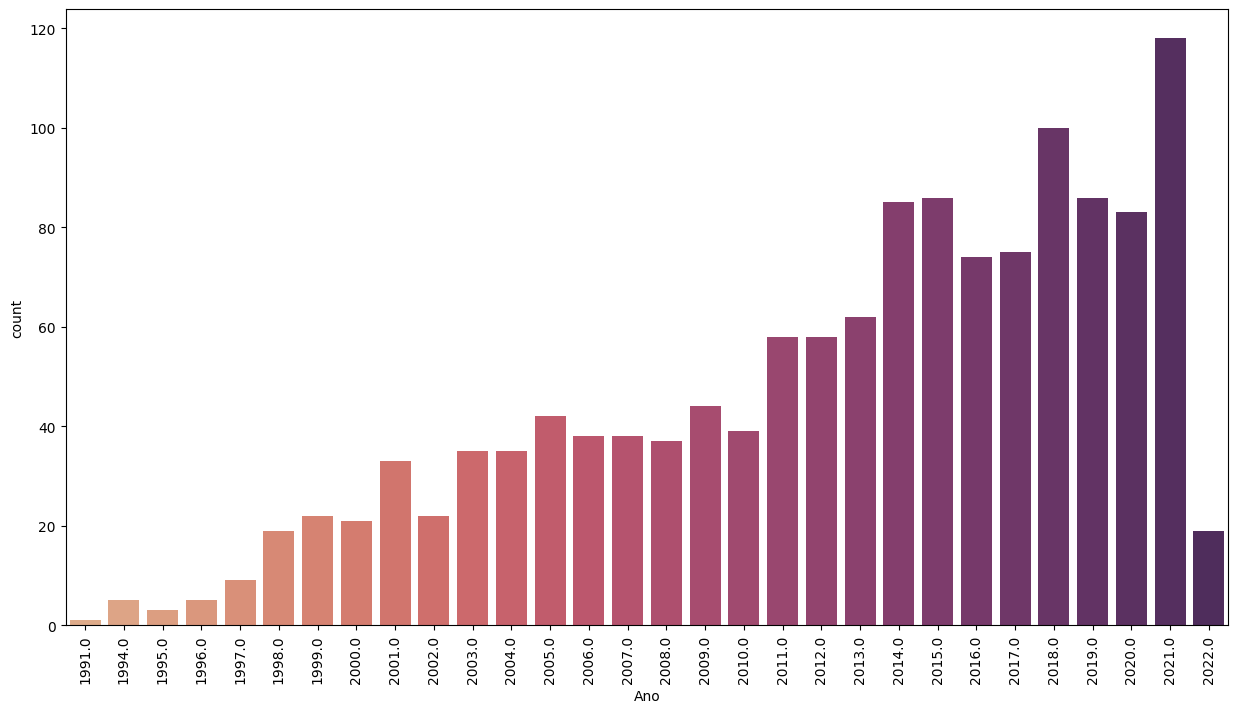

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x = 'Ano',data = df_todos, palette='flare')
plt.xticks(rotation=90)
#order = df['Ano'].value_counts().index,

Artigos por ano (Sim)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '1997'),
  Text(1, 0, '1998'),
  Text(2, 0, '1999'),
  Text(3, 0, '2000'),
  Text(4, 0, '2001'),
  Text(5, 0, '2002'),
  Text(6, 0, '2003'),
  Text(7, 0, '2004'),
  Text(8, 0, '2005'),
  Text(9, 0, '2006'),
  Text(10, 0, '2007'),
  Text(11, 0, '2008'),
  Text(12, 0, '2009'),
  Text(13, 0, '2010'),
  Text(14, 0, '2011'),
  Text(15, 0, '2012'),
  Text(16, 0, '2013'),
  Text(17, 0, '2014'),
  Text(18, 0, '2015'),
  Text(19, 0, '2016'),
  Text(20, 0, '2017'),
  Text(21, 0, '2018'),
  Text(22, 0, '2019'),
  Text(23, 0, '2020'),
  Text(24, 0, '2021')])

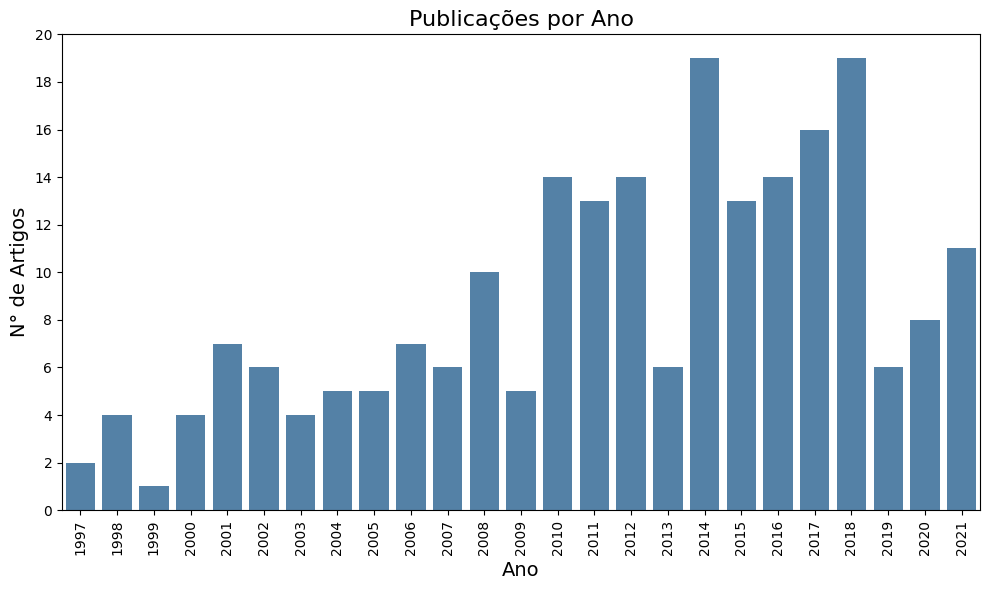

In [ ]:
plt.figure(figsize = (10,6), tight_layout = True)
ax = sns.countplot(x = 'Ano', data = df, color='steelblue')
plt.title("Publicações por Ano", fontsize=16)
plt.ylabel('N° de Artigos', fontsize=14)
plt.xlabel('Ano', fontsize=14 )
plt.yticks(np.arange(0, 21, step=2))
plt.xticks(rotation=90)

Artigos por ano (Sim + Não, separados)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '1991.0'),
  Text(1, 0, '1994.0'),
  Text(2, 0, '1995.0'),
  Text(3, 0, '1996.0'),
  Text(4, 0, '1997.0'),
  Text(5, 0, '1998.0'),
  Text(6, 0, '1999.0'),
  Text(7, 0, '2000.0'),
  Text(8, 0, '2001.0'),
  Text(9, 0, '2002.0'),
  Text(10, 0, '2003.0'),
  Text(11, 0, '2004.0'),
  Text(12, 0, '2005.0'),
  Text(13, 0, '2006.0'),
  Text(14, 0, '2007.0'),
  Text(15, 0, '2008.0'),
  Text(16, 0, '2009.0'),
  Text(17, 0, '2010.0'),
  Text(18, 0, '2011.0'),
  Text(19, 0, '2012.0'),
  Text(20, 0, '2013.0'),
  Text(21, 0, '2014.0'),
  Text(22, 0, '2015.0'),
  Text(23, 0, '2016.0'),
  Text(24, 0, '2017.0'),
  Text(25, 0, '2018.0'),
  Text(26, 0, '2019.0'),
  Text(27, 0, '2020.0'),
  Text(28, 0, '2021.0'),
  Text(29, 0, '2022.0')])

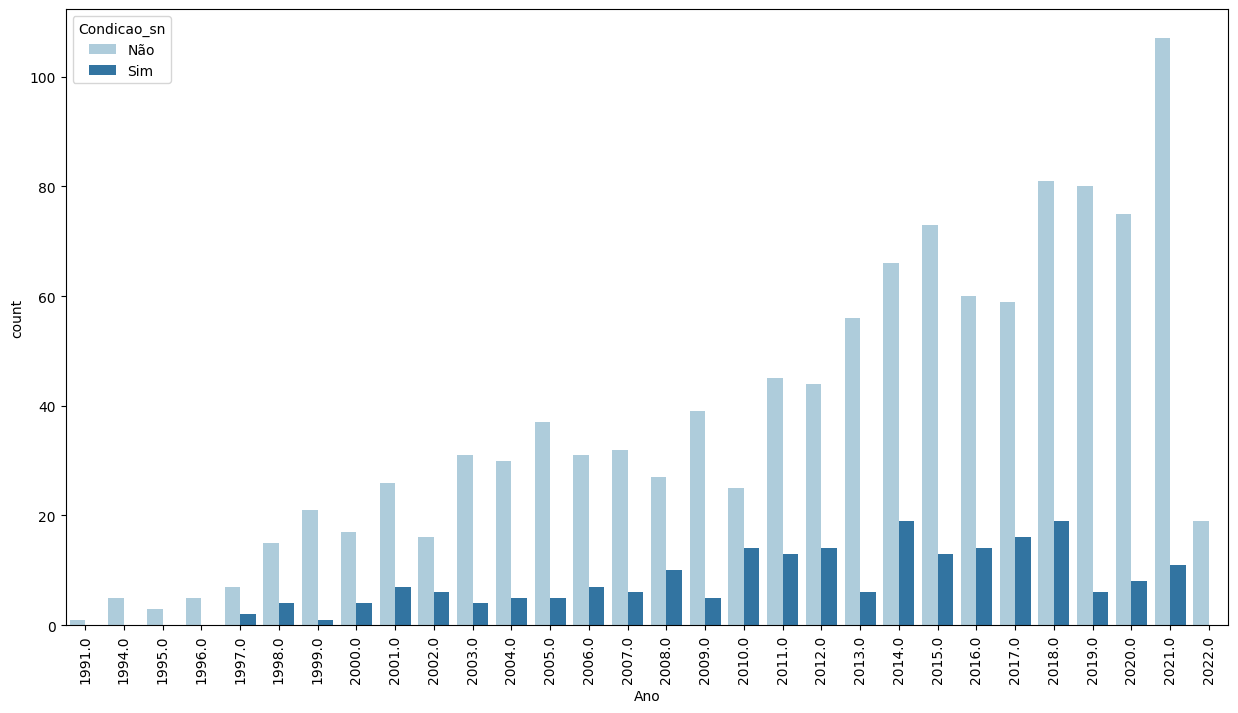

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x = 'Ano', hue='Condicao_sn',data = df_todos, palette='Paired')
plt.xticks(rotation=90)

In [ ]:
df['Tecnologia'].value_counts()

Esterificação + Transesterificação               179
Esterificação + Transesterificação + Extensão     19
Esterificação                                      6
Transesterificação                                 1
Estado Sólido                                      1
ROP                                                1
Refluxo                                            1
Name: Tecnologia, dtype: int64

In [ ]:
#df['Tecnologia'].value_counts().to_csv('tec.csv')

In [ ]:
'''plt.pie(df['Tecnologia'].value_counts(),
        labels=["{0} ({1})".format(k, v) for k, v in df['Tecnologia'].value_counts().items()],
        labeldistance=(2.1))
plt.show()'''

'plt.pie(df[\'Tecnologia\'].value_counts(),\n        labels=["{0} ({1})".format(k, v) for k, v in df[\'Tecnologia\'].value_counts().items()],\n        labeldistance=(2.1))\nplt.show()'

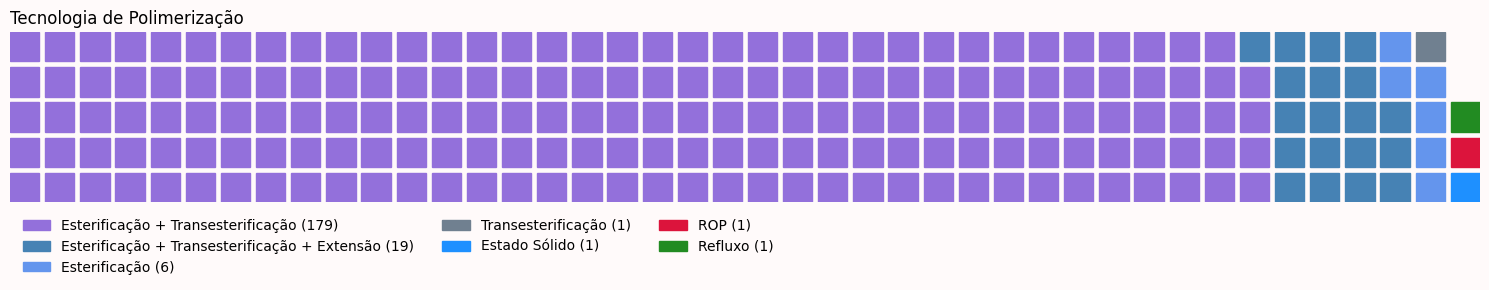

In [ ]:
data = df['Tecnologia'].value_counts()
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    figsize=(15, 8),
    values=data,
    colors=("mediumpurple", "steelblue", "cornflowerblue",'slategrey','dodgerblue','crimson','forestgreen'),
    title={'label': 'Tecnologia de Polimerização', 'loc': 'left'},
    labels=["{0} ({1})".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.5), 'ncol': 3, 'framealpha': 0}
)
fig.gca().set_facecolor('snow')
fig.set_facecolor('snow')
plt.show()

In [ ]:
df['Volume do\n reator (ml)'].value_counts()

250.0     29
500.0     22
1000.0     9
100.0      8
7500.0     5
50.0       4
2000.0     3
200.0      3
10.0       2
3000.0     2
520.0      1
300.0      1
Name: Volume do\n reator (ml), dtype: int64

Text(0, 0.5, 'Nº de Artigos')

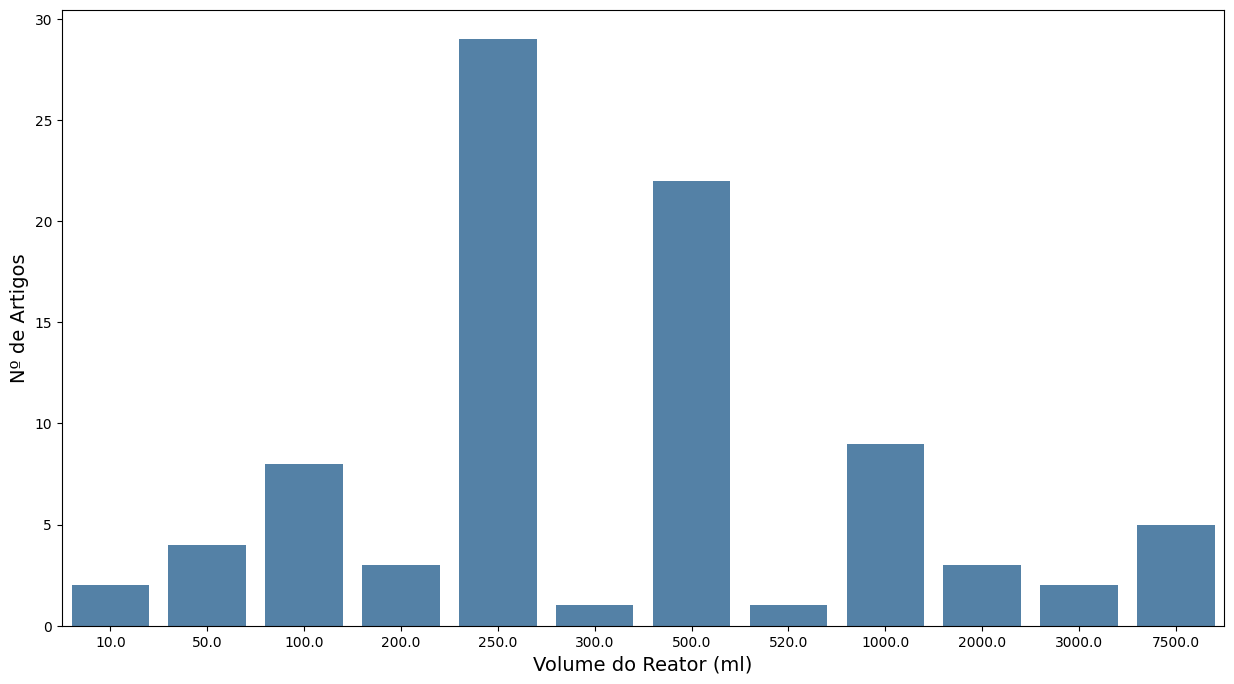

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x = 'Volume do\n reator (ml)',data = df, color="steelblue")
#xlabels = ['{:,.2f}'.format()]
#ax.set_xticklabels(xlabels)
#plt.xticks(rotation=90)
#plt.title('Volume', loc='center')
plt.xlabel('Volume do Reator (ml)', fontsize=14)
plt.ylabel('Nº de Artigos', fontsize=14)

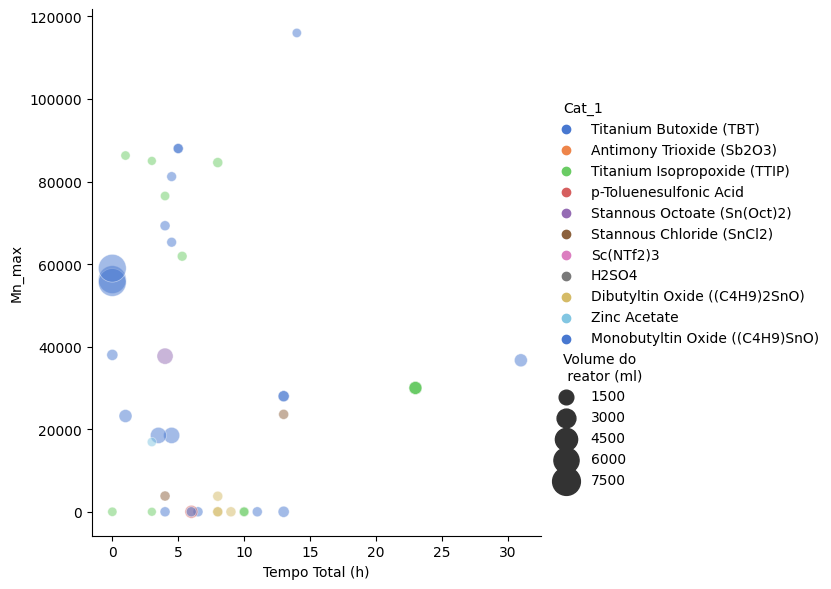

In [ ]:
sns.relplot(x="Tempo Total (h)", y="Mn_max", hue="Cat_1", size="Volume do\n reator (ml)",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

In [ ]:
df['Volume do\n reator (ml)'].mean()

889.7752808988764

In [ ]:
df['BDO:AS'].value_counts()

1.200    59
1.100    35
1.000    24
1.500    11
1.050     7
1.300     7
1.700     6
1.650     5
0.960     3
0.800     2
2.000     2
1.250     2
2.100     2
0.930     1
1.160     1
0.980     1
1.060     1
0.900     1
1.020     1
1.075     1
1.150     1
1.040     1
1.070     1
Name: BDO:AS, dtype: int64

In [ ]:
from matplotlib import ticker

Text(0.5, 0, '')

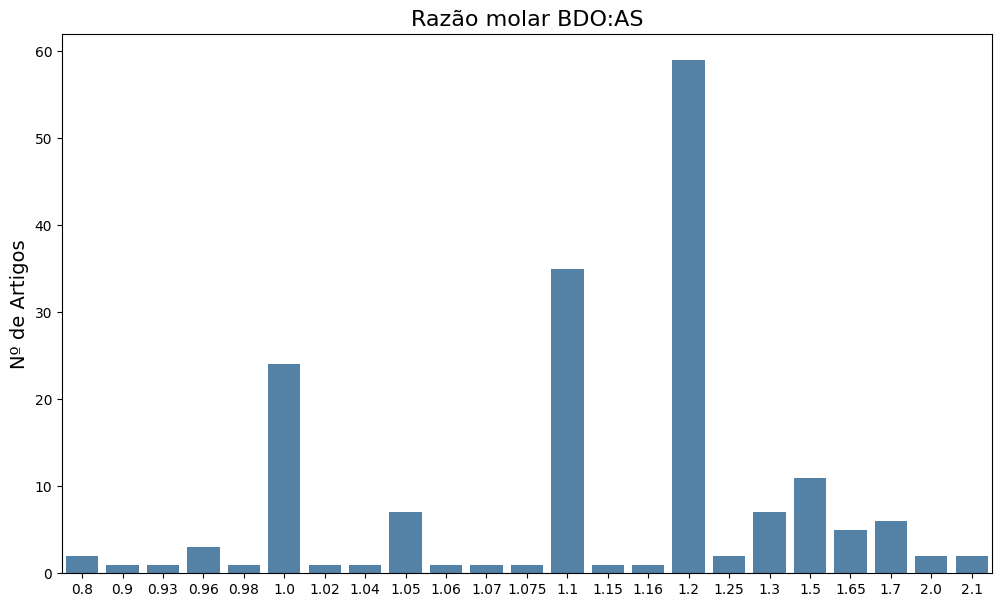

In [ ]:
plt.figure(figsize = (12,7))
ax = sns.countplot(x = df['BDO:AS'],data = df, color='steelblue')
#plt.xticks(rotation=90)
plt.title('Razão molar BDO:AS', fontsize=16)
plt.ylabel('Nº de Artigos', fontsize=14)
plt.xlabel('')

Catalisador 1

In [ ]:
#df = df_todos[df_todos.Condicao =='Sim']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Titanium Butoxide (TBT)'),
  Text(1, 0, 'Titanium Isopropoxide (TTIP)'),
  Text(2, 0, 'Stannous Chloride (SnCl2)'),
  Text(3, 0, 'Dibutyltin Oxide ((C4H9)2SnO)'),
  Text(4, 0, 'Antimony Trioxide (Sb2O3)'),
  Text(5, 0, 'p-Toluenesulfonic Acid'),
  Text(6, 0, 'Stannous Octoate (Sn(Oct)2)'),
  Text(7, 0, 'Sc(NTf2)3'),
  Text(8, 0, 'H2SO4'),
  Text(9, 0, 'Zinc Acetate'),
  Text(10, 0, 'Monobutyltin Oxide ((C4H9)SnO)')])

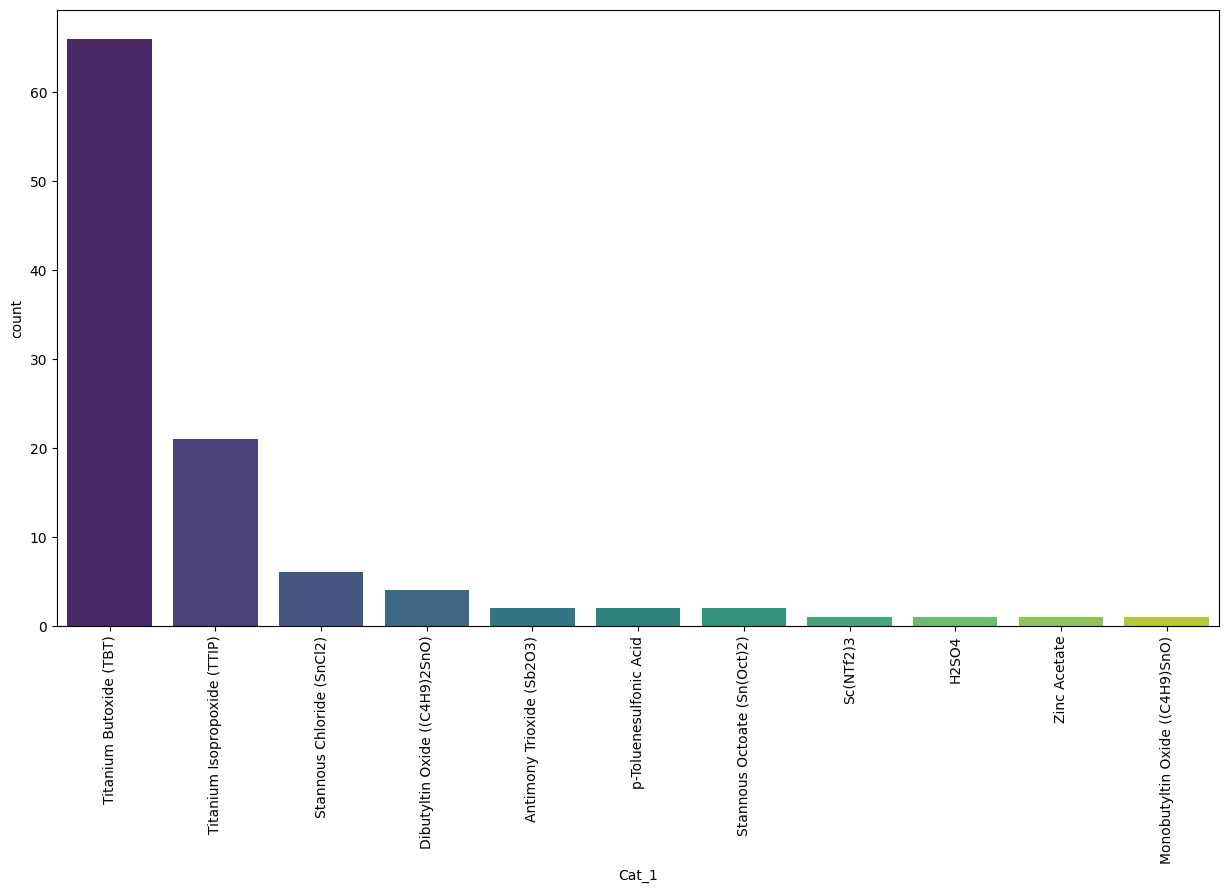

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x = 'Cat_1',data = df, palette='viridis', order = df['Cat_1'].value_counts().index)
plt.xticks(rotation=90)

Catalisador 2

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Titanium Butoxide (TBT)'),
  Text(1, 0, 'Titanium Isopropoxide (TTIP)'),
  Text(2, 0, 'p-Toluenesulfonic Acid'),
  Text(3, 0, 'Diphenylphosphoryl Azide (DPPA)'),
  Text(4, 0, 'Stannous Octoate (SnOct2)'),
  Text(5, 0, 'Butylated hydroxytoluene (BHT)'),
  Text(6, 0, 'Tin(IV) tert-butoxide (Sn(OC(CH3)3)4)'),
  Text(7, 0, 'Stannous Chloride (SnCl2)'),
  Text(8, 0, 'Nd(BH4)3(THF)3'),
  Text(9, 0, 'Triethylamine (N(CH2CH3)3)')])

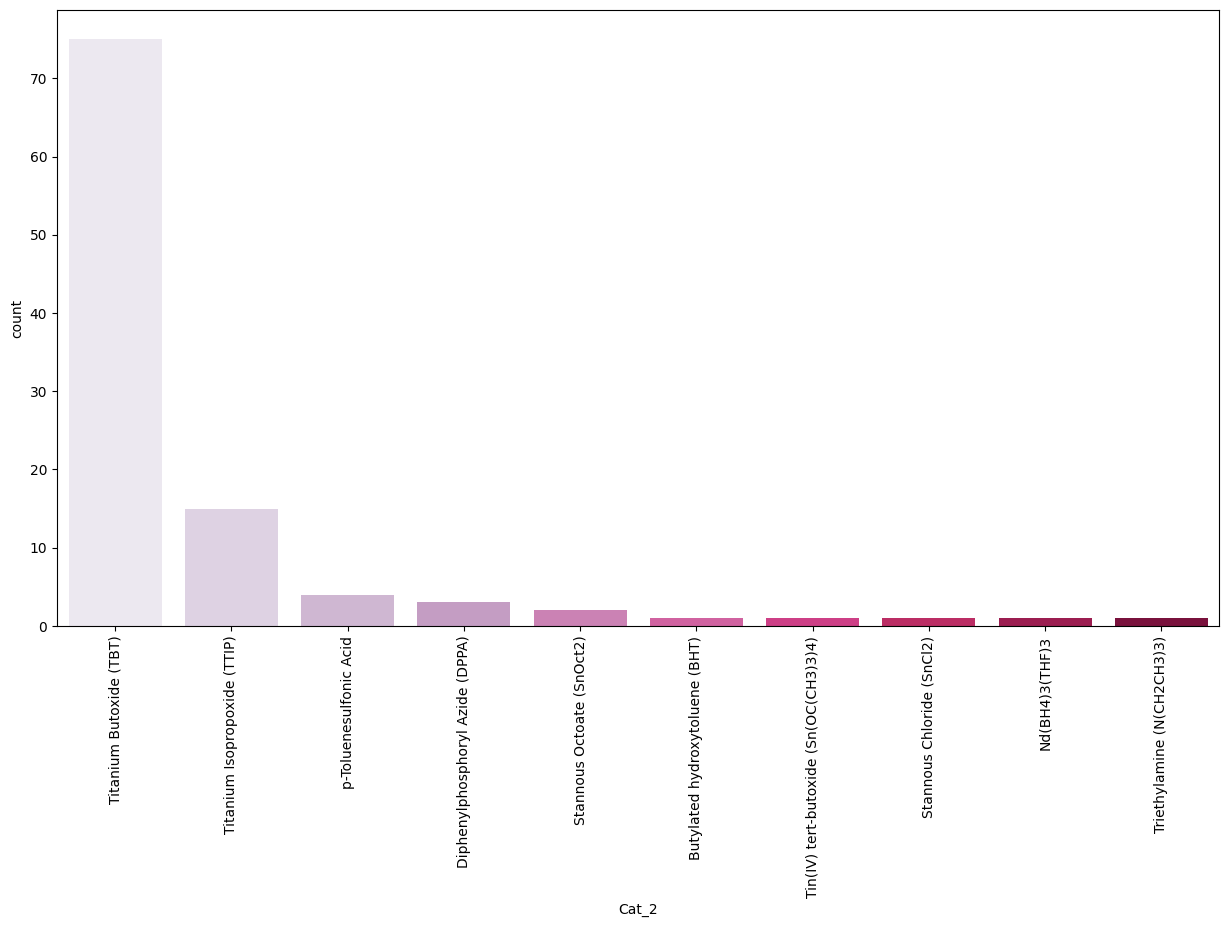

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x = 'Cat_2',data = df, palette='PuRd', order = df['Cat_2'].value_counts().index)
plt.xticks(rotation=90)

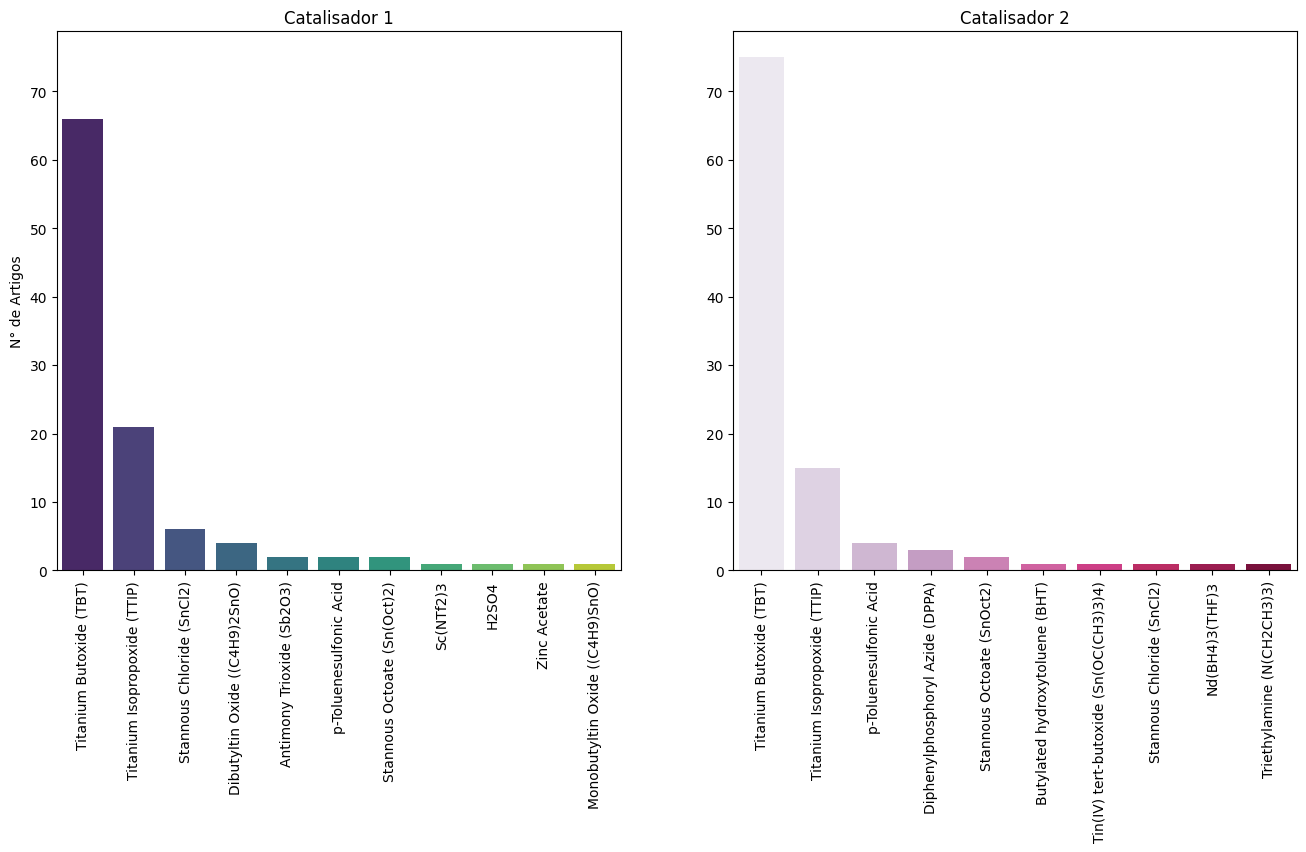

In [ ]:
fig = plt.figure(figsize=(16,7))

cores1 = {'Mn':'orangered', 'Mw':'k'}

eixo1 = plt.subplot(1,2,1)
sns.countplot(x = 'Cat_1',data = df, palette='viridis', order = df['Cat_1'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('N° de Artigos')
plt.title('Catalisador 1')
#plt.legend(cores1, fontsize=12)

'''eixo2 = plt.subplot(1,3,2, sharey=eixo1)
plt.scatter(df['Pressão 2 (bar)'], df['Mn_trans'], color='lightseagreen')
plt.scatter(df['Pressão 2 (bar)'], df['Mw_trans'], color='k')
plt.xlabel('Pressão (bar)')
plt.legend(cores1, fontsize=12)
plt.title('Transesterificação')'''

eixo3 = plt.subplot(1,2,2, sharey=eixo1)
sns.countplot(x = 'Cat_2',data = df, palette='PuRd', order = df['Cat_2'].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel('')
plt.xlabel('')
plt.title('Catalisador 2')
#plt.legend(cores1, fontsize=12)

plt.show()

In [ ]:
df['Cat_1'].value_counts()

Titanium Butoxide (TBT)           66
Titanium Isopropoxide (TTIP)      21
Stannous Chloride (SnCl2)          6
Dibutyltin Oxide ((C4H9)2SnO)      4
Antimony Trioxide (Sb2O3)          2
p-Toluenesulfonic Acid             2
Stannous Octoate (Sn(Oct)2)        2
Sc(NTf2)3                          1
H2SO4                              1
Zinc Acetate                       1
Monobutyltin Oxide ((C4H9)SnO)     1
Name: Cat_1, dtype: int64

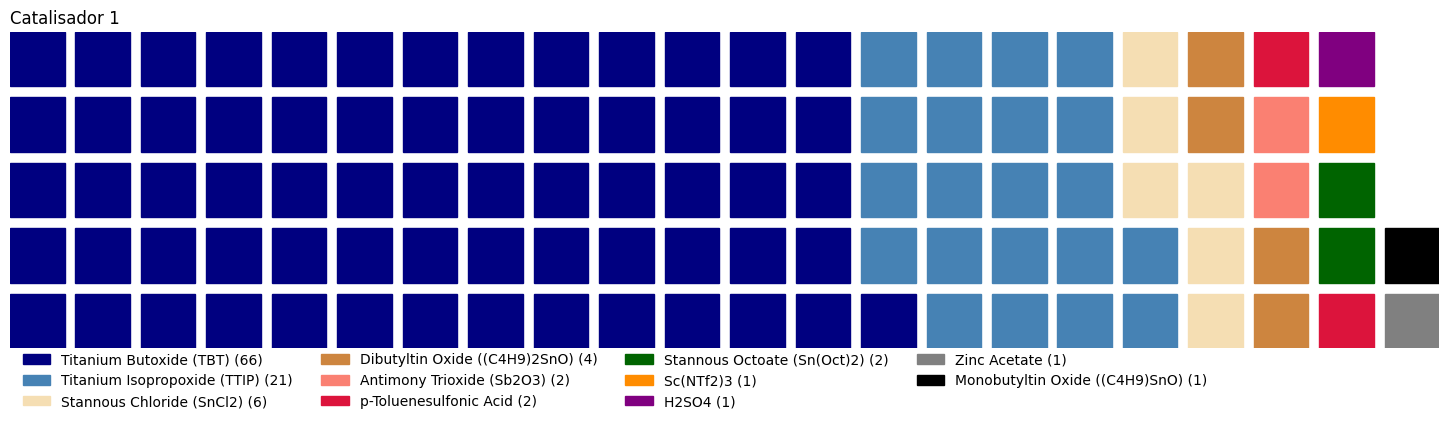

In [ ]:
data = df['Cat_1'].value_counts()
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    figsize=(15, 8),
    values=data,
    colors=("navy", "steelblue", "wheat",'peru','salmon','crimson','darkgreen','darkorange', 'purple', 'gray', 'k'),
    title={'label': 'Catalisador 1', 'loc': 'left'},
    labels=["{0} ({1})".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.23), 'ncol': 4, 'framealpha': 0}
)
fig.gca().set_facecolor('white')
fig.set_facecolor('white')
plt.show()

In [ ]:
df['BDO:AS'].mean()

1.2015142857142855

Temperatura x Massas molares - Esterificação

In [ ]:
df['Temperatura 1 (C)'].value_counts()

190.0    58
180.0    42
200.0    24
150.0    12
145.0    12
170.0     8
210.0     6
220.0     6
140.0     5
225.0     5
185.0     4
195.0     4
160.0     4
230.0     4
135.0     3
20.0      2
243.0     2
80.0      1
110.0     1
130.0     1
155.0     1
240.0     1
120.0     1
Name: Temperatura 1 (C), dtype: int64

In [ ]:
df['Temperatura 1 (C)'].mean()

181.30917874396135

In [ ]:
df['Pressão 1 (bar)'].value_counts()

1.01000    14
2.00000     5
3.50000     4
0.27000     2
0.00067     1
0.01300     1
0.19000     1
0.00300     1
Name: Pressão 1 (bar), dtype: int64

In [ ]:
df['Pressão 1 (bar)'].mean()

1.3409196551724136

In [ ]:
df['Tempo 1 (h)'].mean()

3.4373154362416107

In [ ]:
df['Temperatura 2 (C)'].mean()

223.07731958762886

In [ ]:
df['Pressão 2 (bar)'].mean()

0.0026720967741935484

In [ ]:
df['Tempo 2 (h)'].mean()

5.756794871794871

In [ ]:
df['Tempo de extensão (h)'].mean()

3.264705882352941

In [ ]:
df['Temperatura de extensão (C)'].mean()

148.68421052631578

<Axes: xlabel='Temperatura 1 (C)', ylabel='Mn_est'>

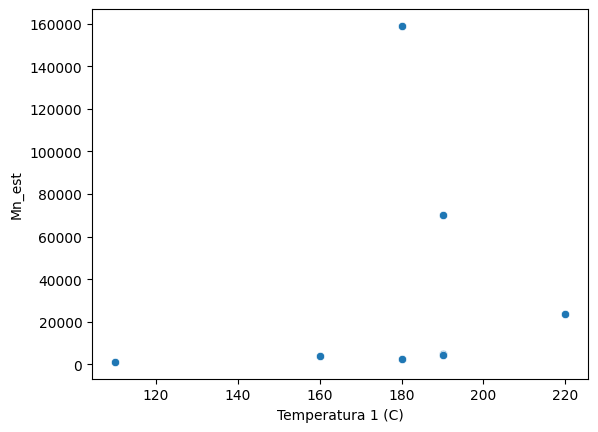

In [ ]:
sns.scatterplot(data=df, x="Temperatura 1 (C)", y="Mn_est")

<Axes: xlabel='Temperatura 1 (C)', ylabel='Mw_est'>

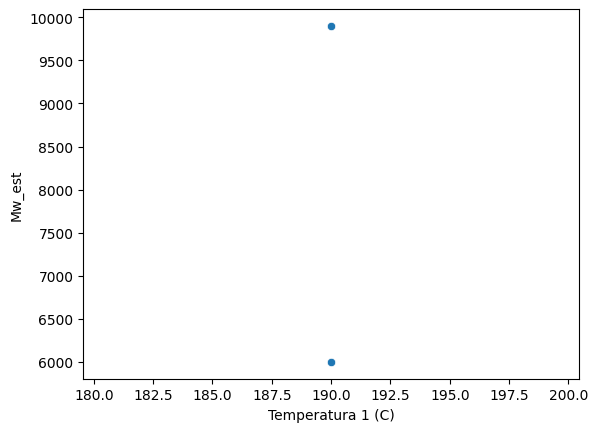

In [ ]:
sns.scatterplot(data=df, x="Temperatura 1 (C)", y="Mw_est")

In [ ]:
fig = plt.figure(figsize=(10,6))
eixo = fig.add_axes([0,0,1,1])

cores = {'Mn Esterificação':'deepskyblue', 'Mw Esterificação':'k', 'Mn Transesterificação':'red', 'Mw Transesterificação':'orange',
         'Mn Extensão':'green', 'Mw Extensão':'purple'}

eixo.scatter(df['Temperatura 1 (C)'], df['Mn_est'], color='deepskyblue')
eixo.scatter(df['Temperatura 1 (C)'], df['Mw_est'], color='k')

eixo.scatter(df['Temperatura 2 (C)'], df['Mn_trans'], color='red')
eixo.scatter(df['Temperatura 2 (C)'], df['Mw_trans'], color='orange')

eixo.scatter(df['Temperatura de extensão (C)'], df['Mnext'], color='green')
eixo.scatter(df['Temperatura de extensão (C)'], df['Mwext'], color='purple')

#eixo.scatter(x=df['comprimento_sépala'], y=df['largura_sépala'])
eixo.set_title('Massas Molares x Temperatura',fontsize=16)
eixo.set_xlabel('Temperatura (°C)',fontsize=14)
eixo.set_ylabel('Massa Molar (Da)', fontsize=14)
eixo.tick_params(labelsize=12)
eixo.legend(cores, fontsize=12)

In [ ]:
fig = plt.figure(figsize=(10,6))
eixo = fig.add_axes([0,0,1,1])

cores = {'Mn Transesterificação':'red', 'Mw Transesterificação':'orange'}

#eixo.scatter(df['Pressão 1 (bar)'], df['Mn_est'], color='deepskyblue')
#eixo.scatter(df['Pressão 1 (bar)'], df['Mw_est'], color='k')

eixo.scatter(df['Pressão 2 (bar)'], df['Mn_trans'], color='red')
eixo.scatter(df['Pressão 2 (bar)'], df['Mw_trans'], color='orange')

#eixo.scatter(df['Temperatura de extensão (C)'], df['Mnext'], color='green')
#eixo.scatter(df['Temperatura de extensão (C)'], df['Mwext'], color='purple')

#eixo.scatter(x=df['comprimento_sépala'], y=df['largura_sépala'])
eixo.set_title('Massas Molares x Pressão',fontsize=16)
eixo.set_xlabel('Pressão (bar)',fontsize=14)
eixo.set_ylabel('Massa Molar (Da)', fontsize=14)
eixo.tick_params(labelsize=12)
eixo.legend(cores, fontsize=12)

In [ ]:
fig = plt.figure(figsize=(10,6))
eixo = fig.add_axes([0,0,1,1])

cores = {'Mn Esterificação':'deepskyblue', 'Mw Esterificação':'k', 'Mn Transesterificação':'red', 'Mw Transesterificação':'orange',
         'Mn Extensão':'green', 'Mw Extensão':'purple'}

eixo.scatter(df['Tempo 1 (h)'], df['Mn_est'], color='deepskyblue')
eixo.scatter(df['Tempo 1 (h)'], df['Mw_est'], color='k')

eixo.scatter(df['Tempo 2 (h)'], df['Mn_trans'], color='red')
eixo.scatter(df['Tempo 2 (h)'], df['Mw_trans'], color='orange')

eixo.scatter(df['Tempo de extensão (h)'], df['Mnext'], color='green')
eixo.scatter(df['Tempo de extensão (h)'], df['Mwext'], color='purple')

#eixo.scatter(x=df['comprimento_sépala'], y=df['largura_sépala'])
eixo.set_title('Massas Molares x Tempo',fontsize=16)
eixo.set_xlabel('Tempo (h)',fontsize=14)
eixo.set_ylabel('Massa Molar (Da)', fontsize=14)
eixo.tick_params(labelsize=12)
eixo.legend(cores, fontsize=12)

Temperatura x Massas Molares - Policondensação

In [ ]:
df['Temperatura 2 (C)'].mean()

In [ ]:
df['Temperatura 2 (C)'].min()

In [ ]:
df['Temperatura 2 (C)'].max()

In [ ]:
sns.scatterplot(data=df, x="Temperatura 2 (C)", y="Mn_trans")
plt.xlim(25, 275)
plt.ylim(0, 250000)

In [ ]:
sns.scatterplot(data=df, x="Temperatura 2 (C)", y="Mw_trans")
plt.xlim(25, 275)
plt.ylim(0, 250000)

In [ ]:
fig = plt.figure(figsize=(10,6))
eixo = fig.add_axes([0,0,1,1])

cores = {'Mn_trans':'r', 'Mw_trans':'b'}

'''for especie in df['espécie'].unique():
    tmp = df[df['espécie'] == especie]
    eixo.scatter(tmp['comprimento_sépala'], tmp['largura_sépala'],
                color=cores[especie])'''
eixo.scatter(df['Temperatura 2 (C)'], df['Mn_trans'], color='orange')
eixo.scatter(df['Temperatura 2 (C)'], df['Mw_trans'], color='k')

#eixo.scatter(x=df['comprimento_sépala'], y=df['largura_sépala'])
eixo.set_title('Policondensação',fontsize=16)
eixo.set_xlabel('Temperatura (C)',fontsize=14)
eixo.set_ylabel('Massa Molar', fontsize=14)
eixo.tick_params(labelsize=12)
eixo.legend(cores, fontsize=12)

In [ ]:
fig = plt.figure(figsize=(10,6))
eixo = fig.add_axes([0,0,1,1])

cores = {'Mn_trans':'r', 'Mw_trans':'b'}

'''for especie in df['espécie'].unique():
    tmp = df[df['espécie'] == especie]
    eixo.scatter(tmp['comprimento_sépala'], tmp['largura_sépala'],
                color=cores[especie])'''
eixo.scatter(df['Temperatura 2 (C)'], df['Mn_trans'], color='orange')
eixo.scatter(df['Temperatura 2 (C)'], df['Mw_trans'], color='k')

#eixo.scatter(x=df['comprimento_sépala'], y=df['largura_sépala'])
eixo.set_title('Policondensação',fontsize=16)
eixo.set_xlabel('Temperatura (C)',fontsize=14)
eixo.set_ylabel('Massa Molar', fontsize=14)
eixo.tick_params(labelsize=12)
eixo.legend(cores, fontsize=12)
eixo.set_xlim(175, 270)


PDI Esterificações

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x = 'PDI_est',data = df, palette='Reds')
#xlabels = ['{:,.2f}'.format()]
#ax.set_xticklabels(xlabels)
plt.xticks(rotation=90)

In [ ]:
df.PDI_est.value_counts()

PDI Policondensações

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x = 'PDI_trans',data = df, palette='Blues')
plt.xticks(rotation=90)

Temperatura x Massa Molar - Extensão

In [ ]:
fig = plt.figure(figsize=(10,6))
eixo = fig.add_axes([0,0,1,1])

cores = {'Mn_trans':'r', 'Mw_trans':'b', 'Mnext':'k','Mwext':'g'}

eixo.scatter(df['Temperatura de extensão (C)'], df['Mn_trans'], color='gold')
eixo.scatter(df['Temperatura de extensão (C)'], df['Mw_trans'], color='darkorange')
eixo.scatter(df['Temperatura de extensão (C)'], df['Mnext'], color='teal')
eixo.scatter(df['Temperatura de extensão (C)'], df['Mwext'], color='green')

eixo.set_title('Extensão',fontsize=16)
eixo.set_xlabel('Temperatura (C)',fontsize=14)
eixo.set_ylabel('Massa Molar', fontsize=14)
eixo.tick_params(labelsize=12)
eixo.legend(cores)

Tempo...

In [ ]:
sns.lmplot(x='Tempo 1 (h)', y='Mn_est', data=df, ci=False)

In [ ]:
sns.lmplot(x='Tempo 2 (h)', y='Mn_trans', data=df)

In [ ]:
sns.regplot(x='Tempo 2 (h)', y='Mn_trans', data=df, ci=False)

In [ ]:
sns.lmplot(x='Tempo 2 (h)', y='Mn_trans', data=df, ci=False, robust=True)

In [ ]:
sns.jointplot(x='Tempo 2 (h)', y='Mn_trans', data=df, kind='hex')

In [ ]:
sns.jointplot(x='Tempo 1 (h)', y='Mn_est', data=df, kind='hex', color="#4CB391")

In [ ]:
df['Tempo 1 (h)'].mean()

In [ ]:
df['Temperatura 1 (C)'].mean()

In [ ]:
df['Pressão 1 (bar)'].mean()

In [ ]:
df['Tempo 2 (h)'].mean()

In [ ]:
df['Temperatura 2 (C)'].mean()

In [ ]:
df['Pressão 2 (bar)'].mean()

In [ ]:
df['Tempo de extensão (h)'].mean()

In [ ]:
df['Temperatura de extensão (C)'].mean()

In [ ]:
sns.lmplot(x='Pressão 2 (bar)', y='Mn_trans', data=df)
plt.xlim(-0.005, 0.05)
plt.ylim(0, 145000)

In [ ]:
sns.lmplot(x='Pressão 2 (bar)', y='Mw_trans', data=df)
#plt.xlim(25, 275)
#ticks=list(range(0,0.02,0.005))
#plt.xticks(ticks)

In [ ]:
sns.lmplot(x='Pressão 2 (bar)', y='Mn_trans', data=df, robust=True)
#plt.xlim(25, 275)

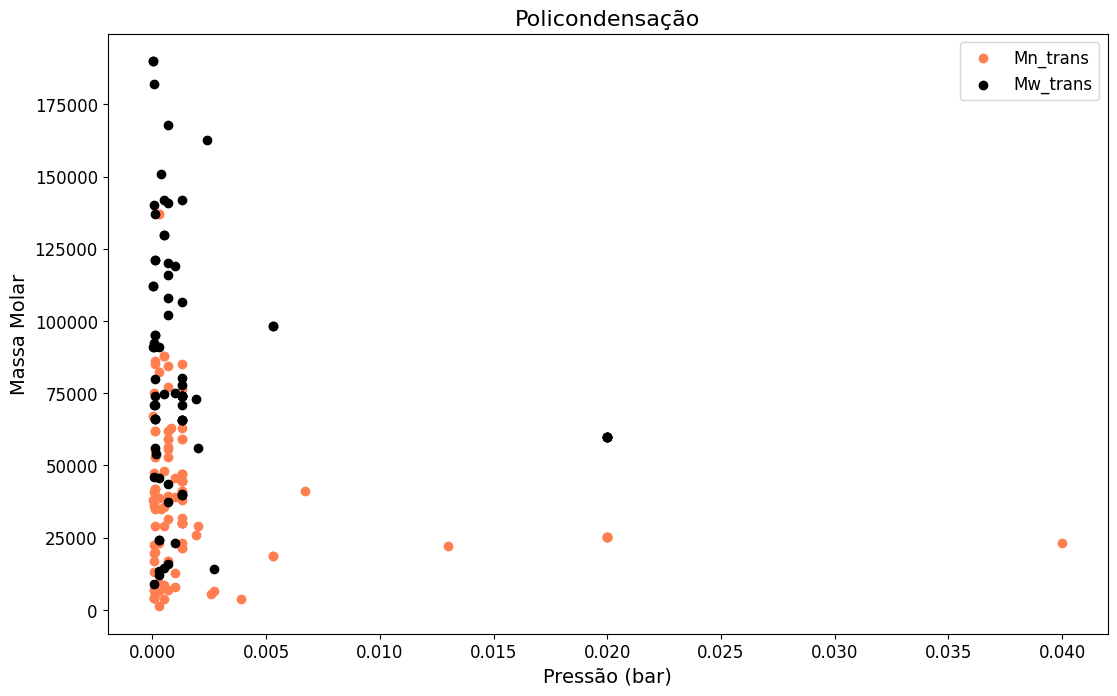

In [ ]:
fig = plt.figure(figsize=(10,6))
eixo = fig.add_axes([0,0,1,1])

cores = {'Mn_trans':'r', 'Mw_trans':'b'}

eixo.scatter(df['Pressão 2 (bar)'], df['Mn_trans'], color='coral')
eixo.scatter(df['Pressão 2 (bar)'], df['Mw_trans'], color='k')

eixo.set_title('Policondensação',fontsize=16)
eixo.set_xlabel('Pressão (bar)',fontsize=14)
eixo.set_ylabel('Massa Molar', fontsize=14)
eixo.tick_params(labelsize=12)
eixo.legend(cores, fontsize=12)

Outliers removidos de Pressão 2 com vácuo alto:

10.1007/s00289-016-1833-x; 10.1002/app.42943

Outliers removidos de Tempo 1 com Tempo longo (maior que 24h):

10.1016/j.eurpolymj.2017.05.002; 10.1002/pc.23454; 10.1002/masy.201400019

Outliers removidos de Tempo 2 com Tempo longo (maior que 24h):

10.1002/pc.23454; 10.1002/mame.201600158; 10.1134/S0965545X1604012X; 10.1002/pi.2255; 10.1021/bm015576a

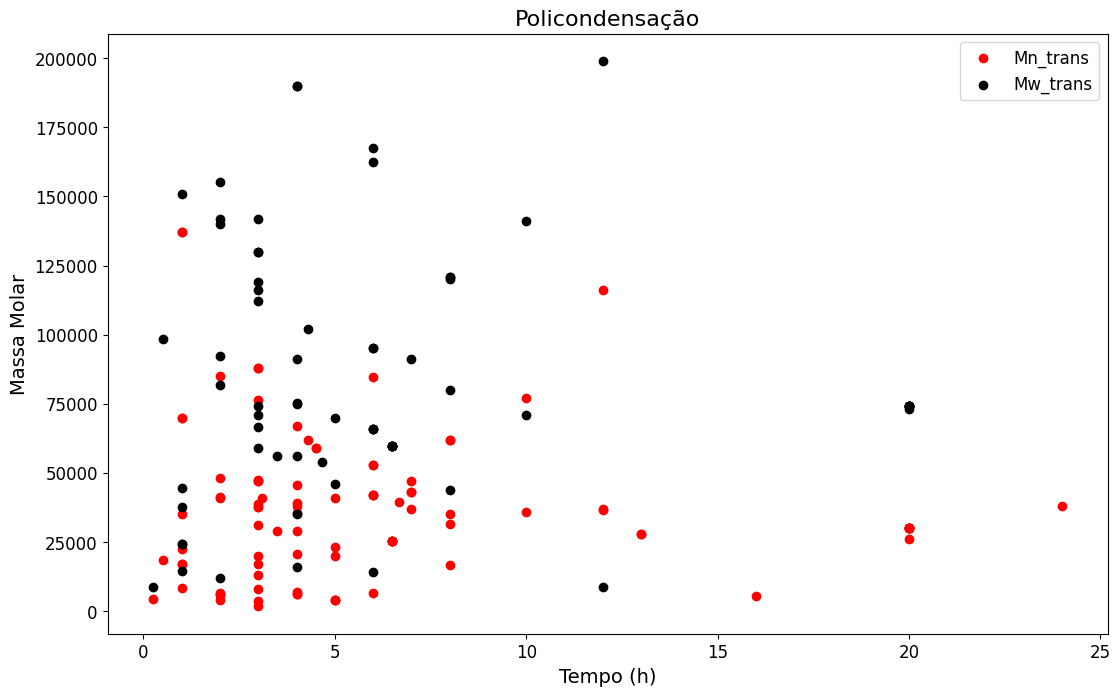

In [ ]:
fig = plt.figure(figsize=(10,6))
eixo = fig.add_axes([0,0,1,1])

cores = {'Mn_trans':'r', 'Mw_trans':'b'}

eixo.scatter(df['Tempo 2 (h)'], df['Mn_trans'], color='red')
eixo.scatter(df['Tempo 2 (h)'], df['Mw_trans'], color='k')

eixo.set_title('Policondensação',fontsize=16)
eixo.set_xlabel('Tempo (h)',fontsize=14)
eixo.set_ylabel('Massa Molar', fontsize=14)
eixo.tick_params(labelsize=12)
eixo.legend(cores, fontsize=12)

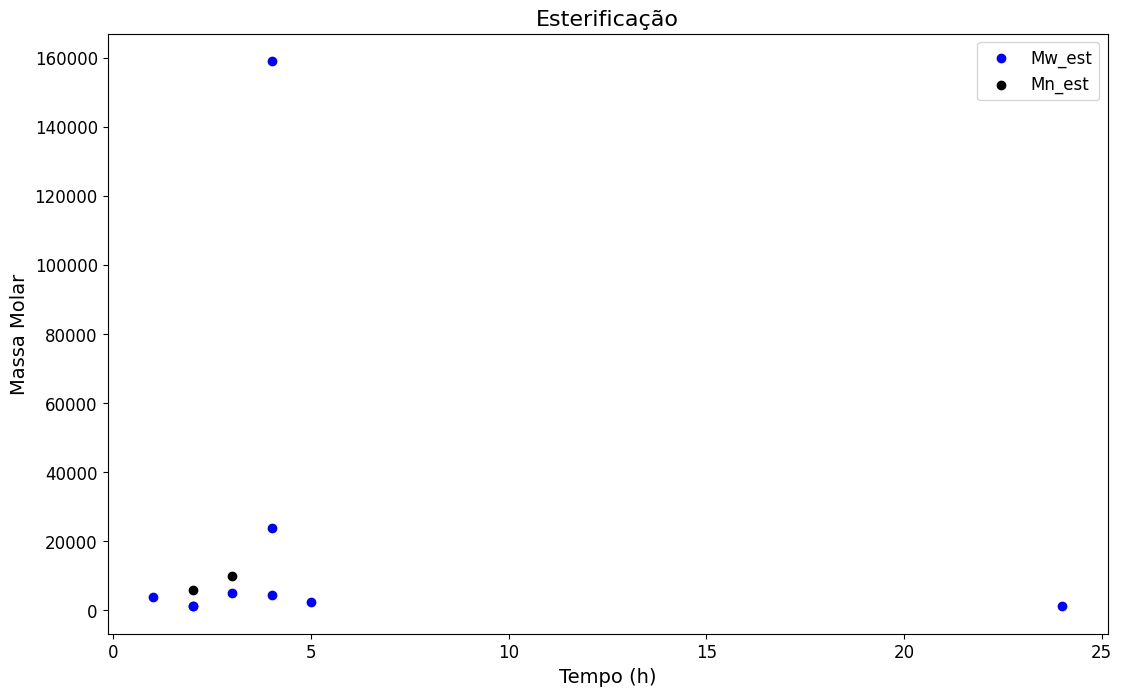

In [ ]:
fig = plt.figure(figsize=(10,6))
eixo = fig.add_axes([0,0,1,1])

cores = {'Mn_est', 'Mw_est'}

eixo.scatter(df['Tempo 1 (h)'], df['Mn_est'], color='blue')
eixo.scatter(df['Tempo 1 (h)'], df['Mw_est'], color='k')

eixo.set_title('Esterificação',fontsize=16)
eixo.set_xlabel('Tempo (h)',fontsize=14)
eixo.set_ylabel('Massa Molar', fontsize=14)
eixo.tick_params(labelsize=12)
eixo.legend(cores, fontsize=12)

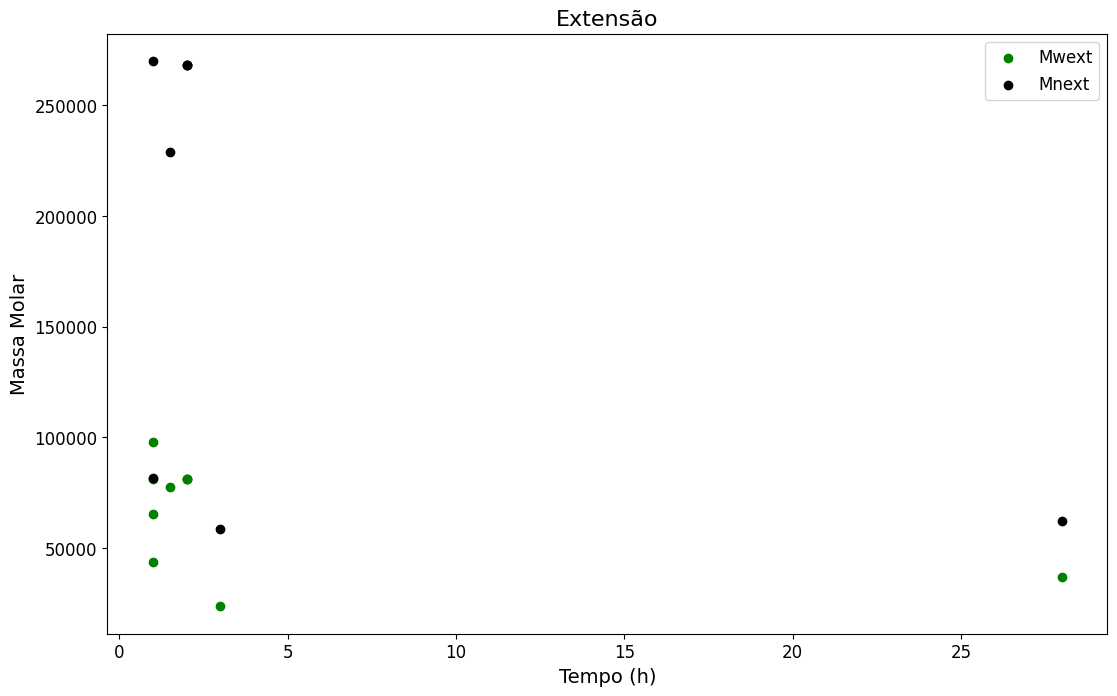

In [ ]:
fig = plt.figure(figsize=(10,6))
eixo = fig.add_axes([0,0,1,1])

cores = {'Mnext', 'Mwext'}

eixo.scatter(df['Tempo de extensão (h)'], df['Mnext'], color='green')
eixo.scatter(df['Tempo de extensão (h)'], df['Mwext'], color='k')

eixo.set_title('Extensão',fontsize=16)
eixo.set_xlabel('Tempo (h)',fontsize=14)
eixo.set_ylabel('Massa Molar', fontsize=14)
eixo.tick_params(labelsize=12)
eixo.legend(cores, fontsize=12)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1.87'),
  Text(1, 0, '2.48'),
  Text(2, 0, '2.5'),
  Text(3, 0, '2.7'),
  Text(4, 0, '2.95'),
  Text(5, 0, '3.31')])

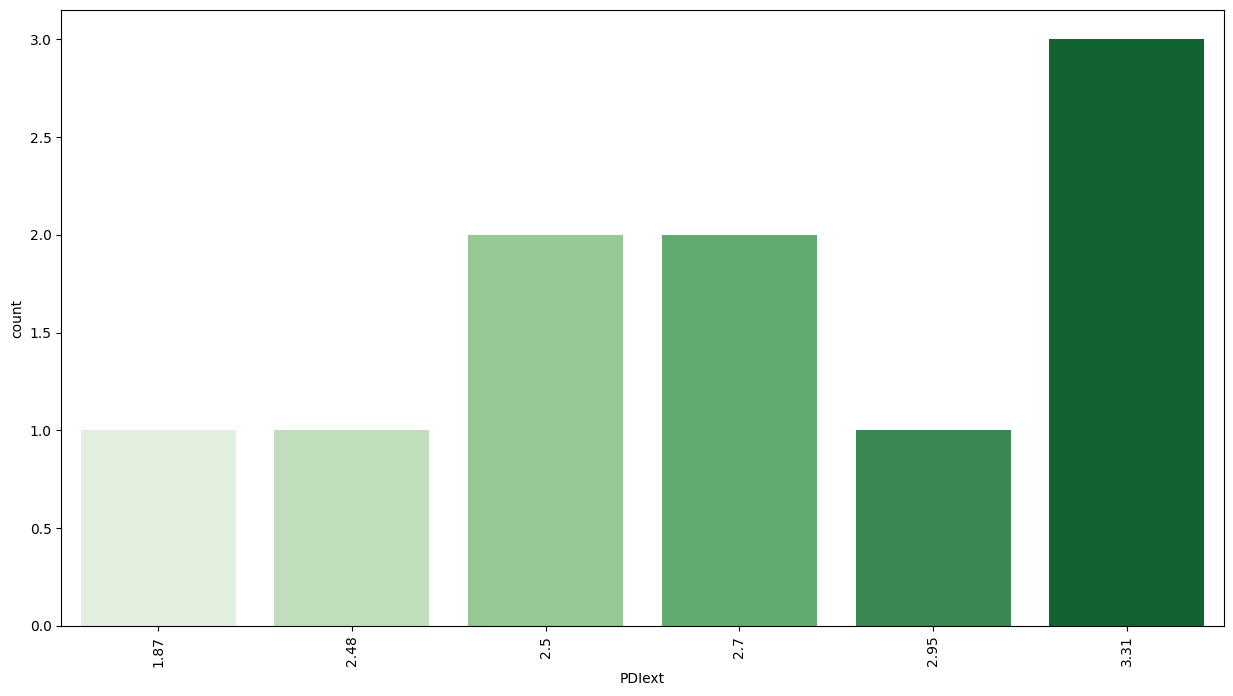

In [ ]:
plt.figure(figsize = (15,8))
ax = sns.countplot(x = 'PDIext',data = df, palette='Greens')
plt.xticks(rotation=90)

A fazer...

In [ ]:
pbs_catalisador = df.groupby('Cat_1')
pbs_catalisador_medias = pbs_catalisador.mean()
#pbs_catalisador_medias.to_excel('pbs_catalisador_medias.xlsx')

<ipython-input-77-183b80a0ea9e>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pbs_catalisador_medias = pbs_catalisador.mean()


In [ ]:
pbs_catalisador_medias

,Ano,Volume do\n reator (ml),BDO:AS,Quantidade_cat1 (mmol),Quantidade_cat1 (ml),Quantidade_cat1 (g),Quantidade_cat1 (ppm),Quantidade_cat2 (mmol),Quantidade_cat2 (ml),Quantidade_cat2 (g),Quantidade_cat2 (ppm),Etapa de adição \ndo catalisador 1,Etapa de adição \ndo catalisador 2,Etapa de adição do aditivo,Temperatura 1 (C),Temperatura 2 (C),Pressão 1 (bar),Pressão 2 (bar),Tempo 1 (h),Tempo 2 (h),Etapa de adição do extensor,Tempo de extensão (h),Temperatura de extensão (C),Mn_est,Mw_est,PDI_est,Mn_trans,Mw_trans,PDI_trans,Mnext,Mwext,PDIext_raw,PDIext,MFI (g/10min),MFIext,MFR,MFRext,Viscosidade_est (poise),Acidez_est,Tempo Total (h),Mn_max
Cat_1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Antimony Trioxide (Sb2O3),2017.000000,NaN,1.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.500000,2.00,NaN,165.000000,232.500000,NaN,0.000175,4.000000,3.625000,NaN,NaN,NaN,NaN,NaN,NaN,4238.000000,49916.500000,2.090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.625000,2119.000000
Dibutyltin Oxide ((C4H9)2SnO),2009.000000,250.000000,1.540000,NaN,NaN,0.220000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,176.250000,205.000000,NaN,0.002608,5.000000,3.250000,NaN,NaN,NaN,NaN,NaN,NaN,3770.000000,112000.000000,2.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.250000,942.500000
H2SO4,2015.000000,NaN,1.000000,NaN,0.080000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,135.000000,200.000000,NaN,NaN,6.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8760.000000,3.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,0.000000
Monobutyltin Oxide ((C4H9)SnO),1998.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,180.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000
Sc(NTf2)3,2016.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,80.000000,90.000000,NaN,0.000030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112000.000000,2.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
Stannous Chloride (SnCl2),2013.000000,250.000000,1.136667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.250000,1.25,NaN,153.333333,220.000000,1.010000,0.019225,6.000000,4.000000,3.0,3.000000,200.000000,NaN,6000.0,NaN,15365.250000,35351.333333,2.202500,23600.000000,58500.0,2.480,2.480,NaN,NaN,NaN,NaN,NaN,NaN,9.833333,13076.833333
Stannous Octoate (Sn(Oct)2),2016.000000,2000.000000,1.250000,NaN,NaN,NaN,440.000000,NaN,NaN,NaN,440.0,1.000000,3.00,1.0,185.000000,235.000000,NaN,0.000050,3.000000,6.500000,NaN,NaN,NaN,NaN,NaN,NaN,36750.000000,70900.000000,2.090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.500000,36750.000000
Titanium Butoxide (TBT),2011.893939,1535.000000,1.203273,6.750000,0.163333,0.253800,216.666667,6.25,NaN,NaN,NaN,1.000000,1.60,1.7,177.265625,223.688525,1.084444,0.001685,3.240667,5.448000,3.0,5.285714,137.857143,61266.666667,NaN,2.13,39662.177778,109780.750000,2.314615,71033.333333,216500.0,2.986,2.986,32.5,NaN,NaN,NaN,NaN,NaN,6.484697,35724.651515
Titanium Isopropoxide (TTIP),2009.666667,437.142857,1.093158,0.404571,NaN,0.181675,NaN,1.56,NaN,NaN,NaN,1.055556,1.50,1.0,201.000000,226.937500,0.506500,0.000915,2.481111,9.376471,NaN,NaN,NaN,NaN,NaN,NaN,47981.733333,93380.000000,2.341333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.717143,34272.666667


In [ ]:
pbs_catalisador_medias['Mn_est']

Cat_1
Antimony Trioxide (Sb2O3)                  NaN
Dibutyltin Oxide ((C4H9)2SnO)              NaN
H2SO4                                      NaN
Monobutyltin Oxide ((C4H9)SnO)             NaN
Sc(NTf2)3                                  NaN
Stannous Chloride (SnCl2)                  NaN
Stannous Octoate (Sn(Oct)2)                NaN
Titanium Butoxide (TBT)           61266.666667
Titanium Isopropoxide (TTIP)               NaN
Zinc Acetate                               NaN
p-Toluenesulfonic Acid                     NaN
Name: Mn_est, dtype: float64

In [ ]:
pbs_catalisador_medias['Mw_est']

Cat_1
Antimony Trioxide (Sb2O3)            NaN
Dibutyltin Oxide ((C4H9)2SnO)        NaN
H2SO4                                NaN
Monobutyltin Oxide ((C4H9)SnO)       NaN
Sc(NTf2)3                            NaN
Stannous Chloride (SnCl2)         6000.0
Stannous Octoate (Sn(Oct)2)          NaN
Titanium Butoxide (TBT)              NaN
Titanium Isopropoxide (TTIP)         NaN
Zinc Acetate                         NaN
p-Toluenesulfonic Acid               NaN
Name: Mw_est, dtype: float64

In [ ]:
pbs_catalisador_medias['Mn_trans']

Cat_1
Antimony Trioxide (Sb2O3)          4238.000000
Dibutyltin Oxide ((C4H9)2SnO)      3770.000000
H2SO4                                      NaN
Monobutyltin Oxide ((C4H9)SnO)             NaN
Sc(NTf2)3                                  NaN
Stannous Chloride (SnCl2)         15365.250000
Stannous Octoate (Sn(Oct)2)       36750.000000
Titanium Butoxide (TBT)           39662.177778
Titanium Isopropoxide (TTIP)      47981.733333
Zinc Acetate                      16900.000000
p-Toluenesulfonic Acid            38000.000000
Name: Mn_trans, dtype: float64

In [ ]:
pbs_catalisador_medias['Mw_trans']

Cat_1
Antimony Trioxide (Sb2O3)          49916.500000
Dibutyltin Oxide ((C4H9)2SnO)     112000.000000
H2SO4                               8760.000000
Monobutyltin Oxide ((C4H9)SnO)              NaN
Sc(NTf2)3                         112000.000000
Stannous Chloride (SnCl2)          35351.333333
Stannous Octoate (Sn(Oct)2)        70900.000000
Titanium Butoxide (TBT)           109780.750000
Titanium Isopropoxide (TTIP)       93380.000000
Zinc Acetate                       37500.000000
p-Toluenesulfonic Acid                      NaN
Name: Mw_trans, dtype: float64

In [ ]:
pbs_catalisador_medias['Mnext']

Cat_1
Antimony Trioxide (Sb2O3)                  NaN
Dibutyltin Oxide ((C4H9)2SnO)              NaN
H2SO4                                      NaN
Monobutyltin Oxide ((C4H9)SnO)             NaN
Sc(NTf2)3                                  NaN
Stannous Chloride (SnCl2)         23600.000000
Stannous Octoate (Sn(Oct)2)                NaN
Titanium Butoxide (TBT)           71033.333333
Titanium Isopropoxide (TTIP)               NaN
Zinc Acetate                               NaN
p-Toluenesulfonic Acid                     NaN
Name: Mnext, dtype: float64

In [ ]:
pbs_catalisador_medias['Mwext']

Cat_1
Antimony Trioxide (Sb2O3)              NaN
Dibutyltin Oxide ((C4H9)2SnO)          NaN
H2SO4                                  NaN
Monobutyltin Oxide ((C4H9)SnO)         NaN
Sc(NTf2)3                              NaN
Stannous Chloride (SnCl2)          58500.0
Stannous Octoate (Sn(Oct)2)            NaN
Titanium Butoxide (TBT)           216500.0
Titanium Isopropoxide (TTIP)           NaN
Zinc Acetate                           NaN
p-Toluenesulfonic Acid                 NaN
Name: Mwext, dtype: float64

In [ ]:
pbs_extensor = df.groupby('Extensor')
pbs_extensor_medias = pbs_extensor.mean()

<ipython-input-85-373ecc6f8e6a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pbs_extensor_medias = pbs_extensor.mean()


In [ ]:
pbs_extensor_medias['Mnext']

Extensor
DEAH; HDI                98000.000000
HDI                      72971.428571
HDI + Ácido Fosfórico    51600.000000
PBOX; ABC                23600.000000
TDI                               NaN
Name: Mnext, dtype: float64

In [ ]:
pbs_extensor_medias['Mwext']

Extensor
DEAH; HDI                270000.0
HDI                      222920.0
HDI + Ácido Fosfórico    146000.0
PBOX; ABC                 58500.0
TDI                           NaN
Name: Mwext, dtype: float64

In [ ]:
pbs_tecnologia = df.groupby('Tecnologia')
pbs_tecnologia_medias = pbs_tecnologia.mean()

<ipython-input-88-261ba4808555>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pbs_tecnologia_medias = pbs_tecnologia.mean()


In [ ]:
pbs_tecnologia_medias['Mn_est']

Tecnologia
Estado Sólido                                        NaN
Esterificação                                    58775.0
Esterificação + Transesterificação                6498.0
Esterificação + Transesterificação + Extensão     4300.0
ROP                                                  NaN
Refluxo                                              NaN
Transesterificação                                   NaN
Name: Mn_est, dtype: float64

In [ ]:
pbs_tecnologia_medias['Mw_est']

Tecnologia
Estado Sólido                                       NaN
Esterificação                                    9900.0
Esterificação + Transesterificação               6000.0
Esterificação + Transesterificação + Extensão       NaN
ROP                                                 NaN
Refluxo                                             NaN
Transesterificação                                  NaN
Name: Mw_est, dtype: float64

In [ ]:
pbs_tecnologia_medias['Mn_trans']

Tecnologia
Estado Sólido                                    12650.000000
Esterificação                                             NaN
Esterificação + Transesterificação               40398.420168
Esterificação + Transesterificação + Extensão     9735.666667
ROP                                              38000.000000
Refluxo                                                   NaN
Transesterificação                                        NaN
Name: Mn_trans, dtype: float64

In [ ]:
pbs_tecnologia_medias['Mw_trans']

Tecnologia
Estado Sólido                                    23310.000000
Esterificação                                             NaN
Esterificação + Transesterificação               83578.282353
Esterificação + Transesterificação + Extensão    48075.000000
ROP                                                       NaN
Refluxo                                                   NaN
Transesterificação                                        NaN
Name: Mw_trans, dtype: float64

05/07

In [ ]:
df.describe()

,Ano,Volume do\n reator (ml),BDO:AS,Quantidade_cat1 (mmol),Quantidade_cat1 (ml),Quantidade_cat1 (g),Quantidade_cat1 (ppm),Quantidade_cat2 (mmol),Quantidade_cat2 (ml),Quantidade_cat2 (g),Quantidade_cat2 (ppm),Etapa de adição \ndo catalisador 1,Etapa de adição \ndo catalisador 2,Etapa de adição do aditivo,Temperatura 1 (C),Temperatura 2 (C),Pressão 1 (bar),Pressão 2 (bar),Tempo 1 (h),Tempo 2 (h),Etapa de adição do extensor,Tempo de extensão (h),Temperatura de extensão (C),Mn_est,Mw_est,PDI_est,Mn_trans,Mw_trans,PDI_trans,Mnext,Mwext,PDIext_raw,PDIext,MFI (g/10min),MFIext,MFR,MFRext,Viscosidade_est (poise),Acidez_est,Tempo Total (h),Mn_max
count,219.000000,89.000000,175.000000,10.000000,4.000000,15.000000,7.000000,3.000000,2.000000,7.000000,2.000000,92.000000,86.000000,25.000000,207.000000,194.000000,29.000000,155.000000,149.000000,156.000000,19.0,17.000000,19.000000,10.000000,2.000000,5.000000,137.000000,94.000000,124.000000,12.000000,10.000000,10.000000,10.000000,4.000000,0.0,0.0,0.0,0.0,2.0,219.000000,219.000000
mean,2011.885845,889.775281,1.201514,2.308200,0.142500,0.210827,248.571429,4.686667,0.145000,0.287586,370.000000,1.032609,1.930233,1.440000,181.309179,223.077320,1.340920,0.002672,3.437315,5.756795,3.0,3.264706,148.684211,27189.000000,7950.000000,2.134000,38123.218978,81476.787234,2.179919,64358.333333,179710.000000,2.763000,2.763000,31.350000,NaN,NaN,NaN,NaN,8.9,6.692785,28118.767123
std,6.130143,1711.165856,0.224414,6.224368,0.105948,0.187559,158.685073,5.467589,0.007071,0.256895,98.994949,0.178583,0.298652,0.506623,29.354563,23.639985,1.057618,0.007956,2.740442,5.171729,0.0,6.427766,28.178109,51011.147899,2757.716447,0.229085,26471.676989,47061.386240,0.662452,23932.460206,93264.837366,0.466239,0.466239,20.395016,NaN,NaN,NaN,NaN,0.0,5.949545,30768.729733
min,1997.000000,10.000000,0.800000,0.010000,0.080000,0.004200,100.000000,1.500000,0.140000,0.003100,300.000000,1.000000,1.000000,1.000000,20.000000,60.000000,0.000670,0.000027,1.000000,0.250000,3.0,1.000000,115.000000,1100.000000,6000.000000,1.820000,1200.000000,2450.000000,1.420000,23600.000000,58500.000000,1.870000,1.870000,5.400000,NaN,NaN,NaN,NaN,8.9,0.000000,0.000000
25%,2008.000000,250.000000,1.087500,0.108000,0.080000,0.069000,100.000000,1.530000,0.142500,0.060000,335.000000,1.000000,2.000000,1.000000,180.000000,220.000000,1.010000,0.000100,2.000000,3.000000,3.0,1.000000,130.000000,1525.000000,6975.000000,1.980000,20500.000000,54550.000000,1.767500,41950.000000,86700.000000,2.500000,2.500000,23.850000,NaN,NaN,NaN,NaN,8.9,3.000000,0.000000
50%,2013.000000,250.000000,1.200000,0.240000,0.095000,0.220000,200.000000,1.560000,0.145000,0.350000,370.000000,1.000000,2.000000,1.000000,190.000000,230.000000,1.010000,0.000600,3.000000,4.000000,3.0,1.500000,140.000000,4095.000000,7950.000000,2.200000,35800.000000,74000.000000,1.980000,73950.000000,209500.000000,2.700000,2.700000,32.500000,NaN,NaN,NaN,NaN,8.9,5.750000,23000.000000
75%,2017.000000,500.000000,1.200000,0.630000,0.157500,0.283000,400.000000,6.280000,0.147500,0.430000,405.000000,1.000000,2.000000,2.000000,192.500000,240.000000,2.000000,0.001300,4.000000,6.500000,3.0,3.000000,160.000000,19025.000000,8925.000000,2.300000,48000.000000,111025.000000,2.472500,81000.000000,268000.000000,3.220000,3.220000,40.000000,NaN,NaN,NaN,NaN,8.9,8.000000,43350.000000
max,2021.000000,7500.000000,2.100000,20.000000,0.300000,0.748000,440.000000,11.000000,0.150000,0.680000,440.000000,2.000000,3.000000,2.000000,243.000000,280.000000,3.500000,0.067000,24.000000,24.000000,3.0,28.000000,200.000000,159000.000000,9900.000000,2.370000,137000.000000,199000.000000,5.320000,98000.000000,270000.000000,3.310000,3.310000,55.000000,NaN,NaN,NaN,NaN,8.9,31.000000,159000.000000


In [ ]:
df.columns

Index(['Condicao', 'Condicao_sn', 'Autores', 'Titulo', 'Publicacao',
       'Keywords_Autor', 'Keywords_Automatico', 'Resumo', 'Ano', 'DOI',
       'Tecnologia_raw', 'Tecnologia', 'Volume do\n reator (ml)',
       'Volume\nreacional', 'BDO:AS_raw', 'BDO:AS', 'Catalisador 1_raw',
       'Cat_1', 'Cat_1_tit', 'Quantidade de\ncatalisador 1_raw',
       'Quantidade_cat1 (mmol)', 'Quantidade_cat1 (ml)', 'Quantidade_cat1 (g)',
       'Quantidade_cat1 (ppm)', 'Solvente do catalisador 1',
       'Concentracao da solucao de catalisador 1', 'Catalisador 2_raw',
       'Cat_2', 'Cat_2_tit', 'cat_so_na_1', 'cat_so_na_2', 'cat_nas_duas',
       'Quantidade de\ncatalisador 2', 'Quantidade_cat2 (mmol)',
       'Quantidade_cat2 (ml)', 'Quantidade_cat2 (g)', 'Quantidade_cat2 (ppm)',
       'Solvente do catalisador 2', 'Concentracao da solucao de catalisador 2',
       'Aditivo', 'AS:Aditivo', 'Etapa de adição \ndo catalisador 1_raw',
       'Etapa de adição \ndo catalisador 1',
       'Etapa de adição 

In [ ]:
grouped1 = df['Mn_est'].groupby(df['Cat_1_tit'])
grouped1.mean()

Cat_1_tit
n             NaN
s    61266.666667
Name: Mn_est, dtype: float64

In [ ]:
grouped2 = df['Mw_est'].groupby(df['Cat_1_tit'])
grouped2.mean()

Cat_1_tit
n    6000.0
s       NaN
Name: Mw_est, dtype: float64

In [ ]:
grouped3 = df['Mn_trans'].groupby(df['Cat_2_tit'])
grouped3.mean()

Cat_2_tit
n    45002.222222
s    39938.709677
Name: Mn_trans, dtype: float64

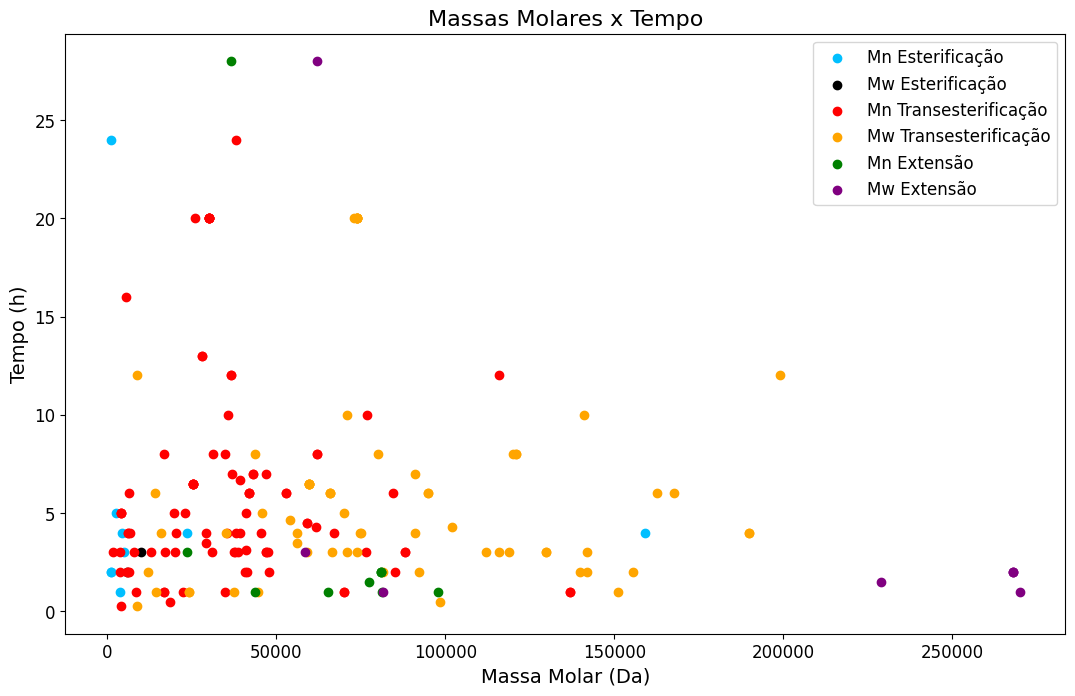

In [ ]:
fig = plt.figure(figsize=(10,6))
eixo = fig.add_axes([0,0,1,1])

cores = {'Mn Esterificação':'deepskyblue', 'Mw Esterificação':'k', 'Mn Transesterificação':'red', 'Mw Transesterificação':'orange',
         'Mn Extensão':'green', 'Mw Extensão':'purple'}

eixo.scatter(df['Mn_est'], df['Tempo 1 (h)'], color='deepskyblue')
eixo.scatter(df['Mw_est'], df['Tempo 1 (h)'], color='k')

eixo.scatter(df['Mn_trans'], df['Tempo 2 (h)'],  color='red')
eixo.scatter(df['Mw_trans'], df['Tempo 2 (h)'],  color='orange')

eixo.scatter(df['Mnext'], df['Tempo de extensão (h)'],  color='green')
eixo.scatter(df['Mwext'], df['Tempo de extensão (h)'],  color='purple')

#eixo.scatter(x=df['comprimento_sépala'], y=df['largura_sépala'])
eixo.set_title('Massas Molares x Tempo',fontsize=16)
eixo.set_ylabel('Tempo (h)',fontsize=14)
eixo.set_xlabel('Massa Molar (Da)', fontsize=14)
eixo.tick_params(labelsize=12)
eixo.legend(cores, fontsize=12)

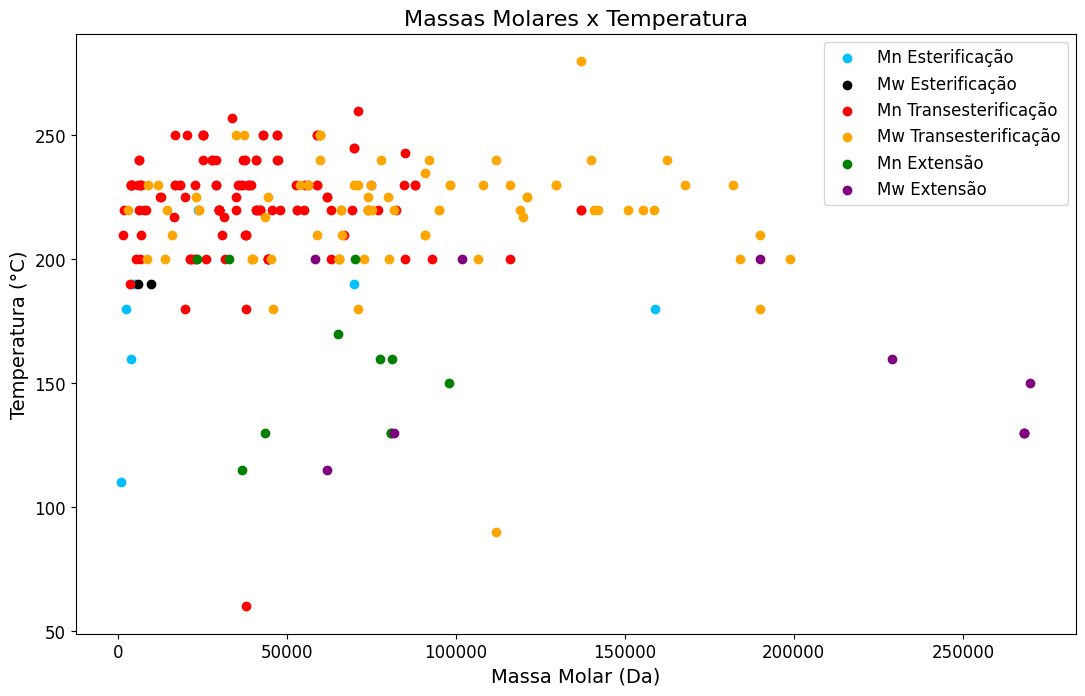

In [ ]:
fig = plt.figure(figsize=(10,6))
eixo = fig.add_axes([0,0,1,1])

cores = {'Mn Esterificação':'deepskyblue', 'Mw Esterificação':'k', 'Mn Transesterificação':'red', 'Mw Transesterificação':'orange',
         'Mn Extensão':'green', 'Mw Extensão':'purple'}

eixo.scatter( df['Mn_est'], df['Temperatura 1 (C)'], color='deepskyblue')
eixo.scatter( df['Mw_est'], df['Temperatura 1 (C)'], color='k')

eixo.scatter( df['Mn_trans'],df['Temperatura 2 (C)'], color='red')
eixo.scatter( df['Mw_trans'],df['Temperatura 2 (C)'], color='orange')

eixo.scatter( df['Mnext'],df['Temperatura de extensão (C)'], color='green')
eixo.scatter( df['Mwext'],df['Temperatura de extensão (C)'], color='purple')

eixo.set_title('Massas Molares x Temperatura',fontsize=16)
eixo.set_ylabel('Temperatura (°C)',fontsize=14)
eixo.set_xlabel('Massa Molar (Da)', fontsize=14)
eixo.tick_params(labelsize=12)
eixo.legend(cores, fontsize=12)

In [ ]:
df['Temperatura 1 (C)'].mean()

181.30917874396135

In [ ]:
df['Pressão 1 (bar)'].mean()

1.3409196551724136

In [ ]:
df['Tempo 1 (h)'].mean()

3.4373154362416107

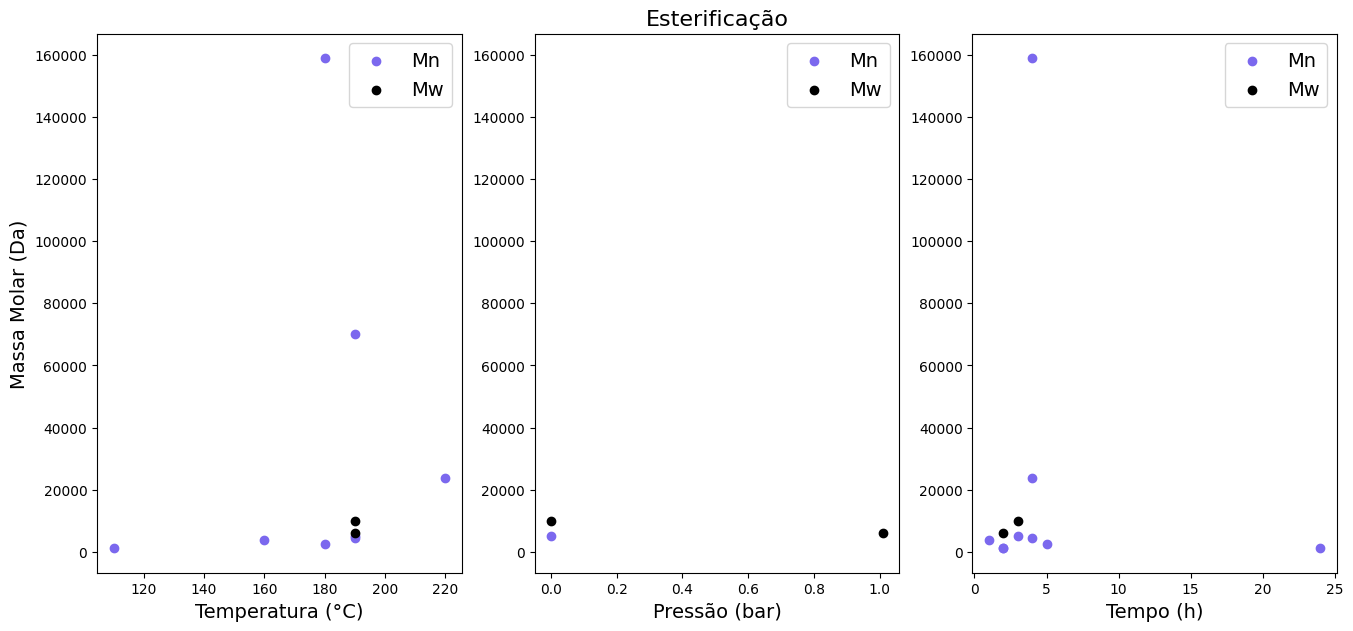

In [ ]:
fig = plt.figure(figsize=(16, 7))
cores1 = {'Mn':'mediumslateblue', 'Mw':'k'}

eixo1 = plt.subplot(1,3,1)
plt.scatter(df['Temperatura 1 (C)'], df['Mn_est'], color='mediumslateblue')
plt.scatter(df['Temperatura 1 (C)'], df['Mw_est'], color='k')
plt.xlabel('Temperatura (°C)', fontsize=14)
plt.ylabel('Massa Molar (Da)', fontsize=14)
plt.legend(cores1, fontsize=14)

eixo2 = plt.subplot(1,3,2, sharey=eixo1)
#cores2 = {'Mn Esterificação':'lightseagreen', 'Mw Esterificação':'mediumslateblue'}
plt.scatter(df['Pressão 1 (bar)'], df['Mn_est'], color='mediumslateblue')
plt.scatter(df['Pressão 1 (bar)'], df['Mw_est'], color='k')
plt.xlabel('Pressão (bar)', fontsize=14)
plt.legend(cores1, fontsize=14)
plt.title('Esterificação', fontsize=16)

eixo3 = plt.subplot(1,3,3, sharey=eixo1)
#cores2 = {'Mn Esterificação':'lightseagreen', 'Mw Esterificação':'mediumslateblue'}
plt.scatter(df['Tempo 1 (h)'], df['Mn_est'], color='mediumslateblue')
plt.scatter(df['Tempo 1 (h)'], df['Mw_est'], color='k')
plt.xlabel('Tempo (h)', fontsize=14)
plt.legend(cores1, fontsize=14)


plt.show()

In [ ]:
df['PDI_est'].mean()

2.134

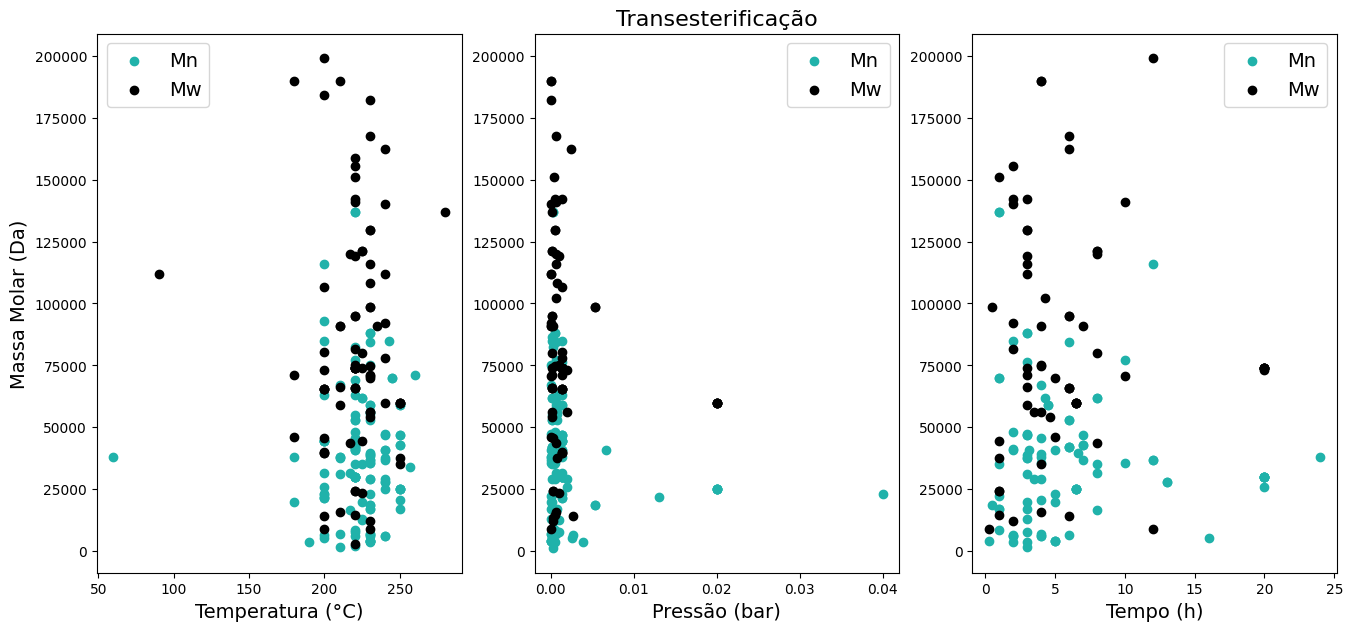

In [ ]:
fig = plt.figure(figsize=(16,7))

cores1 = {'Mn':'lightseagreen', 'Mw':'k'}

eixo1 = plt.subplot(1,3,1)
plt.scatter(df['Temperatura 2 (C)'], df['Mn_trans'], color='lightseagreen')
plt.scatter(df['Temperatura 2 (C)'], df['Mw_trans'], color='k')
plt.xlabel('Temperatura (°C)', fontsize=14)
plt.ylabel('Massa Molar (Da)', fontsize=14)
plt.legend(cores1, fontsize=14)

eixo2 = plt.subplot(1,3,2, sharey=eixo1)
plt.scatter(df['Pressão 2 (bar)'], df['Mn_trans'], color='lightseagreen')
plt.scatter(df['Pressão 2 (bar)'], df['Mw_trans'], color='k')
plt.xlabel('Pressão (bar)', fontsize=14)
plt.legend(cores1, fontsize=14)
plt.title('Transesterificação', fontsize=16)

eixo3 = plt.subplot(1,3,3, sharey=eixo1)
#cores2 = {'Mn Esterificação':'lightseagreen', 'Mw Esterificação':'mediumslateblue'}
plt.scatter(df['Tempo 2 (h)'], df['Mn_trans'], color='lightseagreen')
plt.scatter(df['Tempo 2 (h)'], df['Mw_trans'], color='k')
plt.xlabel('Tempo (h)', fontsize=14)
plt.legend(cores1, fontsize=14)

plt.show()

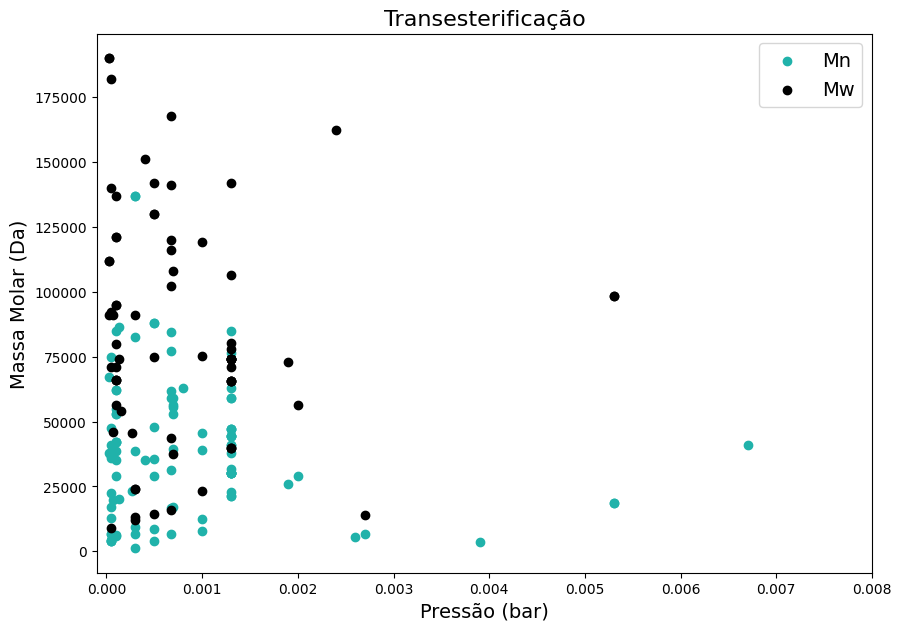

In [ ]:
fig = plt.figure(figsize=(10,7))
plt.scatter(df['Pressão 2 (bar)'], df['Mn_trans'], color='lightseagreen')
plt.scatter(df['Pressão 2 (bar)'], df['Mw_trans'], color='k')
plt.xlabel('Pressão (bar)', fontsize=14)
plt.ylabel('Massa Molar (Da)', fontsize=14)
plt.xlim(-0.0001, 0.008)
plt.legend(cores1, fontsize=14)
plt.title('Transesterificação', fontsize=16)
plt.show()

In [ ]:
df['Temperatura 2 (C)'].mean()

223.07731958762886

In [ ]:
df['Pressão 2 (bar)'].mean()

0.0026720967741935484

In [ ]:
df['Tempo 2 (h)'].mean()

5.756794871794871

In [ ]:
df.columns

Index(['Condicao', 'Condicao_sn', 'Autores', 'Titulo', 'Publicacao',
       'Keywords_Autor', 'Keywords_Automatico', 'Resumo', 'Ano', 'DOI',
       'Tecnologia_raw', 'Tecnologia', 'Volume do\n reator (ml)',
       'Volume\nreacional', 'BDO:AS_raw', 'BDO:AS', 'Catalisador 1_raw',
       'Cat_1', 'Cat_1_tit', 'Quantidade de\ncatalisador 1_raw',
       'Quantidade_cat1 (mmol)', 'Quantidade_cat1 (ml)', 'Quantidade_cat1 (g)',
       'Quantidade_cat1 (ppm)', 'Solvente do catalisador 1',
       'Concentracao da solucao de catalisador 1', 'Catalisador 2_raw',
       'Cat_2', 'Cat_2_tit', 'cat_so_na_1', 'cat_so_na_2', 'cat_nas_duas',
       'Quantidade de\ncatalisador 2', 'Quantidade_cat2 (mmol)',
       'Quantidade_cat2 (ml)', 'Quantidade_cat2 (g)', 'Quantidade_cat2 (ppm)',
       'Solvente do catalisador 2', 'Concentracao da solucao de catalisador 2',
       'Aditivo', 'AS:Aditivo', 'Etapa de adição \ndo catalisador 1_raw',
       'Etapa de adição \ndo catalisador 1',
       'Etapa de adição 

In [ ]:
df['PDI_trans'].mean()

2.17991935483871

In [ ]:
df['Extensor'].value_counts()

HDI                      11
DEAH; HDI                 4
HDI + Ácido Fosfórico     2
PBOX; ABC                 1
TDI                       1
Name: Extensor, dtype: int64

In [ ]:
df['Tempo de extensão (h)'].mean()

3.264705882352941

In [ ]:
df['Temperatura de extensão (C)'].mean()

148.68421052631578

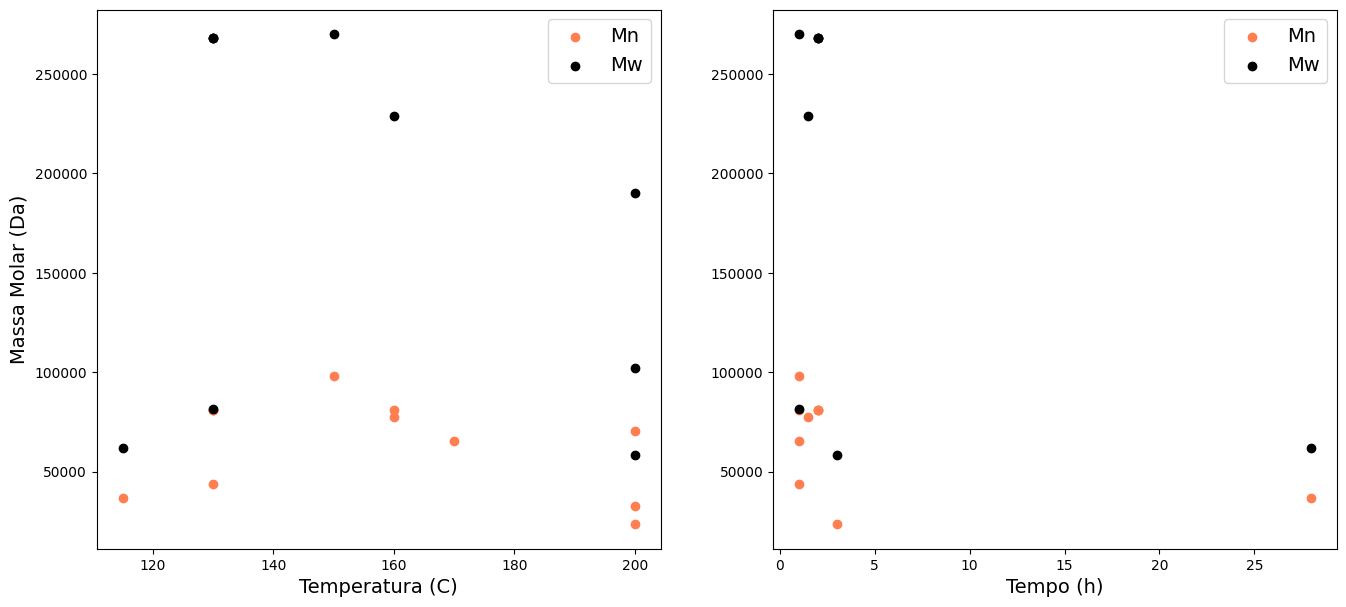

In [ ]:
fig = plt.figure(figsize=(16,7))

cores1 = {'Mn':'coral', 'Mw':'k'}

eixo1 = plt.subplot(1,2,1)
plt.scatter(df['Temperatura de extensão (C)'], df['Mnext'], color='coral')
plt.scatter(df['Temperatura de extensão (C)'], df['Mwext'], color='k')
plt.xlabel('Temperatura (C)', fontsize=14)
plt.ylabel('Massa Molar (Da)', fontsize=14)
plt.legend(cores1, fontsize=14)

'''eixo2 = plt.subplot(1,3,2, sharey=eixo1)
plt.scatter(df['Pressão 2 (bar)'], df['Mn_trans'], color='lightseagreen')
plt.scatter(df['Pressão 2 (bar)'], df['Mw_trans'], color='k')
plt.xlabel('Pressão (bar)')
plt.legend(cores1, fontsize=12)
plt.title('Transesterificação')'''

eixo3 = plt.subplot(1,2,2, sharey=eixo1)
#cores2 = {'Mn Esterificação':'lightseagreen', 'Mw Esterificação':'mediumslateblue'}
plt.scatter(df['Tempo de extensão (h)'], df['Mnext'], color='coral')
plt.scatter(df['Tempo de extensão (h)'], df['Mwext'], color='k')
plt.xlabel('Tempo (h)', fontsize=14)
plt.legend(cores1, fontsize=14)

plt.show()

In [ ]:
df['PDIext'].mean()

2.7630000000000003

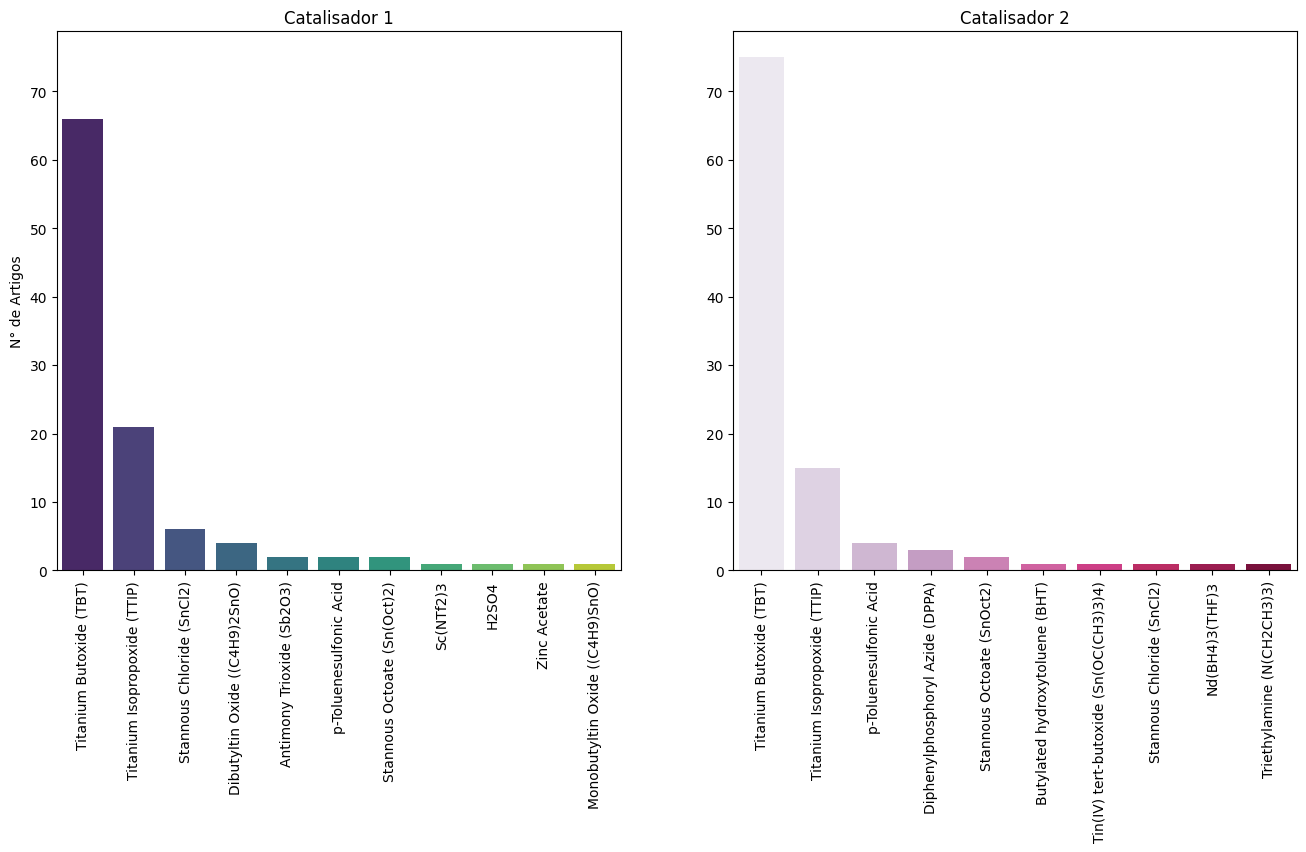

In [ ]:
fig = plt.figure(figsize=(16,7))

cores1 = {'Mn':'orangered', 'Mw':'k'}

eixo1 = plt.subplot(1,2,1)
sns.countplot(x = 'Cat_1',data = df, palette='viridis', order = df['Cat_1'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('N° de Artigos')
plt.title('Catalisador 1')
#plt.legend(cores1, fontsize=12)

'''eixo2 = plt.subplot(1,3,2, sharey=eixo1)
plt.scatter(df['Pressão 2 (bar)'], df['Mn_trans'], color='lightseagreen')
plt.scatter(df['Pressão 2 (bar)'], df['Mw_trans'], color='k')
plt.xlabel('Pressão (bar)')
plt.legend(cores1, fontsize=12)
plt.title('Transesterificação')'''

eixo3 = plt.subplot(1,2,2, sharey=eixo1)
sns.countplot(x = 'Cat_2',data = df, palette='PuRd', order = df['Cat_2'].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel('')
plt.xlabel('')
plt.title('Catalisador 2')
#plt.legend(cores1, fontsize=12)

plt.show()

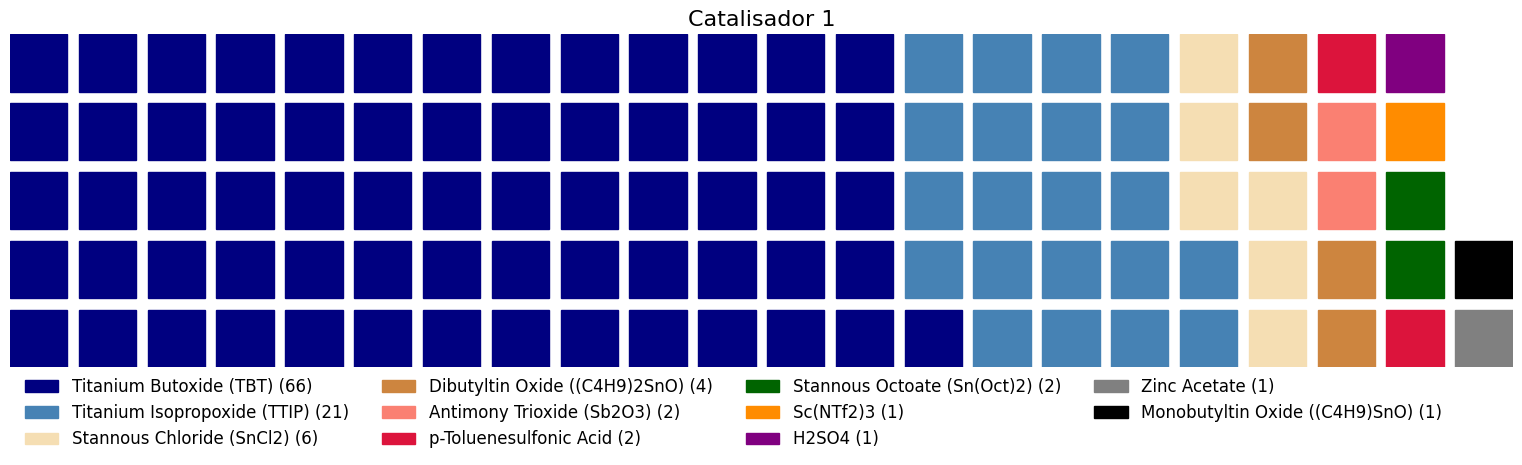

In [ ]:
data = df['Cat_1'].value_counts()
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    figsize=(16, 12),
    values=data,
    colors=("navy", "steelblue", "wheat",'peru','salmon','crimson','darkgreen','darkorange', 'purple', 'gray', 'k'),
    title={'label': 'Catalisador 1', 'loc': 'center', 'fontsize':16},
    labels=["{0} ({1})".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.29), 'ncol': 4, 'framealpha': 0, 'fontsize':12}
)
fig.gca().set_facecolor('white')
fig.set_facecolor('white')

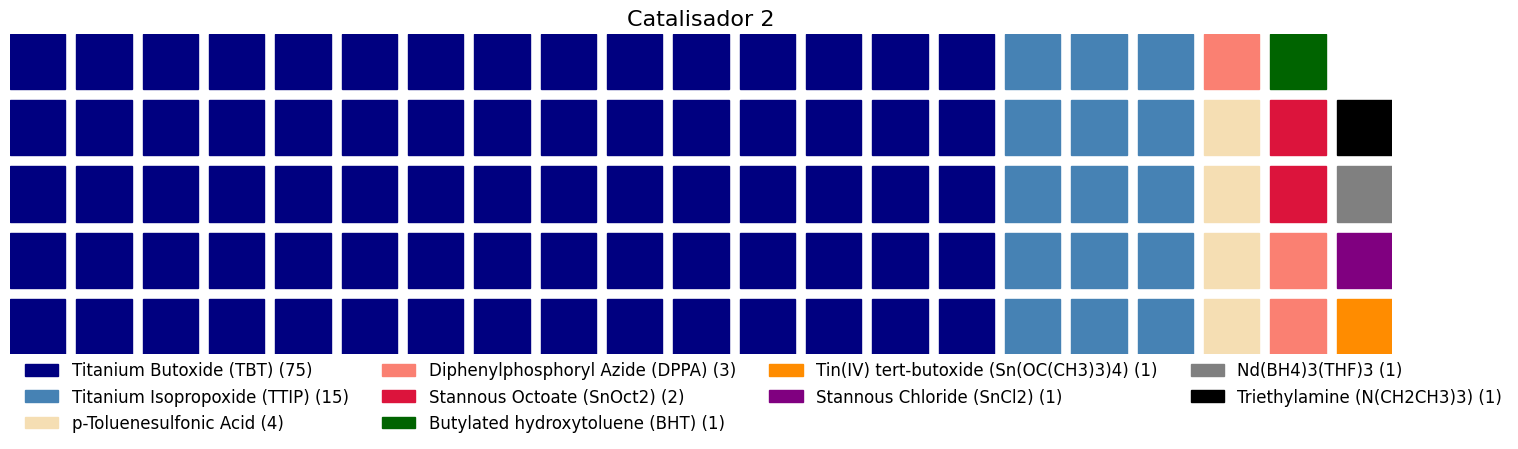

In [ ]:
data = df['Cat_2'].value_counts()
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    figsize=(16, 12),
    values=data,
    colors=("navy", "steelblue", "wheat",'salmon','crimson','darkgreen','darkorange', 'purple', 'gray', 'k'),
    title={'label': 'Catalisador 2', 'loc': 'center', 'fontsize':16},
    labels=["{0} ({1})".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.29), 'ncol': 4, 'framealpha': 0, 'fontsize':12}
)
fig.gca().set_facecolor('white')
fig.set_facecolor('white')

In [ ]:
df['Cat_1_tit'].value_counts()

s    87
n    20
Name: Cat_1_tit, dtype: int64

In [ ]:
df['Cat_2_tit'].value_counts()

s    90
n    14
Name: Cat_2_tit, dtype: int64

In [ ]:
cat1_tit = df.groupby(df['Cat_1_tit'])

In [ ]:
cat1_tit.mean()

<ipython-input-123-a519ad05378d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cat1_tit.mean()


,Ano,Volume do\n reator (ml),BDO:AS,Quantidade_cat1 (mmol),Quantidade_cat1 (ml),Quantidade_cat1 (g),Quantidade_cat1 (ppm),Quantidade_cat2 (mmol),Quantidade_cat2 (ml),Quantidade_cat2 (g),Quantidade_cat2 (ppm),Etapa de adição \ndo catalisador 1,Etapa de adição \ndo catalisador 2,Etapa de adição do aditivo,Temperatura 1 (C),Temperatura 2 (C),Pressão 1 (bar),Pressão 2 (bar),Tempo 1 (h),Tempo 2 (h),Etapa de adição do extensor,Tempo de extensão (h),Temperatura de extensão (C),Mn_est,Mw_est,PDI_est,Mn_trans,Mw_trans,PDI_trans,Mnext,Mwext,PDIext_raw,PDIext,MFI (g/10min),MFIext,MFR,MFRext,Viscosidade_est (poise),Acidez_est,Tempo Total (h),Mn_max
Cat_1_tit,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
n,2012.900000,511.111111,1.19375,NaN,0.080000,0.220000,440.000000,NaN,NaN,0.0031,440.0,1.125000,1.666667,1.000000,166.315789,205.555556,1.840000,0.006333,4.750000,5.661765,3.0,3.000000,200.000000,NaN,6000.0,NaN,19786.900000,54704.700000,2.267692,23600.000000,58500.0,2.480,2.480,5.4,NaN,NaN,NaN,NaN,NaN,8.762500,10743.450000
s,2011.356322,1108.055556,1.17500,2.3082,0.163333,0.209415,216.666667,4.686667,NaN,NaN,NaN,1.013699,1.571429,1.583333,183.129412,224.363636,0.979364,0.001467,3.023651,6.525161,3.0,5.285714,137.857143,61266.666667,NaN,2.13,41742.066667,105464.763158,2.322037,71033.333333,216500.0,2.986,2.986,32.5,NaN,NaN,NaN,NaN,NaN,7.264943,35374.172414


In [ ]:
df2_ = pd.read_excel('PBS_graficos_1803_tratamento_titanio.xlsx')
df2 = df2_[df2_.Condicao_sn =='Sim']
df2['Ano'] = df['Ano'].astype(int)

FileNotFoundError: ignored

In [ ]:
cat2_tit = df2.groupby(df2['Cat_2_tit'])

In [ ]:
cat2_tit.mean()

In [ ]:
catduplo_tit = df.groupby(df['cat_nas_duas'])

In [ ]:
catduplo_tit.mean()

10.1021/acsapm.1c01169 tem um resultado muito bom de massa molar que não é outlier esquisito nem é processo mirabolante. Usam 2 catalisadores, TBT e BHT. Recente, 2021.

In [ ]:
df['cat_nas_duas'].value_counts()

In [ ]:
df['Cat_1_tit'].value_counts()

In [ ]:
df['Cat_2_tit'].value_counts()

In [ ]:
df['Condicao_sn'].value_counts()

In [ ]:
bdoas = df.groupby(df['BDO:AS'])

In [ ]:
bdoas.mean()

In [ ]:
#bdoas.mean().to_csv('bdoas_resultados.csv')

In [ ]:
'''fig = plt.figure(figsize=(16,7))

cores1 = {'Mn':'lightseagreen', 'Mw':'k'}

eixo1 = plt.subplot(1,3,1)
plt.scatter(df['Cat_1'], df['Mn_trans'], color='lightseagreen')
plt.scatter(df['Cat_1'], df['Mw_trans'], color='k')
plt.xlabel('Temperatura (°C)', fontsize=14)
plt.ylabel('Massa Molar (Da)', fontsize=14)
plt.legend(cores1, fontsize=14)

eixo2 = plt.subplot(1,3,2, sharey=eixo1)
plt.scatter(df['Pressão 2 (bar)'], df['Mn_trans'], color='lightseagreen')
plt.scatter(df['Pressão 2 (bar)'], df['Mw_trans'], color='k')
plt.xlabel('Pressão (bar)', fontsize=14)
plt.legend(cores1, fontsize=14)
plt.title('Transesterificação', fontsize=16)

eixo3 = plt.subplot(1,3,3, sharey=eixo1)
#cores2 = {'Mn Esterificação':'lightseagreen', 'Mw Esterificação':'mediumslateblue'}
plt.scatter(df['Tempo 2 (h)'], df['Mn_trans'], color='lightseagreen')
plt.scatter(df['Tempo 2 (h)'], df['Mw_trans'], color='k')
plt.xlabel('Tempo (h)', fontsize=14)
plt.legend(cores1, fontsize=14)

plt.show()'''

In [ ]:
sns.barplot(y='Cat_1', x='Mn_trans', data=df, orient='h')

In [ ]:
sns.barplot(y='Cat_1', x='Mw_trans', data=df, orient='h')